# Session 2: R

---
## 1. The R Environment

* Complete user manual: https://cran.r-project.org/doc/manuals/r-release/R-lang.html.
* As a beginner, I recommend to start coding your scripts using [RStudio](https://www.rstudio.com/).
* As you gain experience and deal with more demanding projects, you can work directly on the [R-GUI console](https://cran.r-project.org/) (current release: `R 4.1.2`), or even better on the Terminal

### 1.1 Introduction

When you open an `R` session, a **console** is displayed, which is where all operations in `R` are run. This is built on an `R` environment that we will call **workspace**. This is the playing field that will contain everything needed to run your code.

In a nutshell, in an `R` workspace there are *things* (objects) and *actions* (operators and functions). Objects are located inside the workspace, and we apply functions to these objects to obtain some desired output. For example: we can create a vector `x` (object) and compute its `mean` (function)

In [1]:
x <- 0:10  # This defines a numeric vector "x" with integers from 0 to 10
mean(x)  # This computes the mean of the vector

[1] 5

Here we displayed an object, an operator, and a function. To create an object, we used an operator of assignment `<-` (right-to-left), and we called a function on this object by placing it inside brackets. We also showed how to comment your code: use `#` to let `R` know it should not run the rest of the line.

Some functions do not require an object to be called. For example, you can explore the objects in your workspace using


In [2]:
ls()

[1] "x"

Most functions also admit **arguments**, which are specifications to control how a function should be run.

In [3]:
pi  # This is a special object built into R
round(pi)  # This functions rounds a number to any decimal point (by default, 0)
round(pi, digits = 1)  # The argument "digits" controls the number of decimals
round(pi, digits = 4)

[1] 3.141593

[1] 3

[1] 3.1

[1] 3.1416

You can know which arguments are admitted by each function, alongside with a detailed function description, by using the `help()` function, or by typing in an `?` in front of the name of the function:

In [4]:
?mean

`R` has a wide array of general functions and operators embedded natively that allow you to do pretty much anything basic. Those functions not readily available that you might require for specific purposes will need to be either (a) installed and loaded from external packages, or (b) coded by YOU. Like many things, coding functions can be both fun and painful.

Similarly, you will not create all objects from scratch in a workspace, sometimes you will be importing data, either numeric, in text, or any other format (maps, JSON, SQL, etc.). Your workspace is just the place where you will work on them to generate some output of interest.

Finally, don't forget to exit your `R` session once your job is done! Do that using the quit function

In [5]:
q()

Use the command `rm(list = ls())` instead if you don't want to leave the session but want to remove every object in it. The `rm()` function will remove what's inside its parenthesis from the workspace, but use it with caution.

### 1.2 General rules to programming (with `R`)

1. **Reproducibility** is everything: write your code containing *all* commands you need in an `R` script (file with extension `.R`), **NOT** in the console. Obviously, in the case of `python`, you should use a `python` script (file with extension `.py`)
2. Make your code as **robust** as possible: be conservative and write safe code, taking all possibilities into account. Being lazy today will cause problems tomorrow.
2. **Comment your code thoroughly** and clarify everything, someone else might read it and needs to know what's happening (even yourself in the future)
3. Follow a **style guide** and do it **consistently**: spacing, indenting, format..., just like you do writing natural language. [This one](http://adv-r.had.co.nz/Style.html) is decent, no need to follow it to the letter, it's an example that you can tweak to make it your own: just stick to the basics, stay consistent and write as if it were to be read. Remember: **clean code = happy programmer**.

---
## 2. Input/Output


### 2.1 Importing functions (libraries)

*Libraries* (a.k.a. *packages*) are bundles of functions generally related to one particular topic. For example, the `xtable` package includes a set of functions to convert a table into $\LaTeX$ readable format.

In `R`, packages need to be installed prior to its use, which then can be loaded into the workspace.

In [6]:
# Install the required package (use single or double quotation marks)
install.packages('xtable')

# Load it into your workspace
library(xtable)  # Option 1
require(xtable)  # Option 2


The downloaded binary packages are in
	/var/folders/sb/zl12mh7176z5glzdfjdtwwkw0000gn/T//Rtmpv0qB7C/downloaded_packages


Both commands do the exact same task: dump every function in the package into your workspace -- the only practical difference is that if the loaded package is not available, `library` will crash, while `require` just returns a warning.

In [7]:
# The following command will give an error
require(mombf)
library(mombf)

Loading required package: mombf

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘mombf’”


ERROR: Error in library(mombf): there is no package called ‘mombf’


There are two ways to call a function from an installed package:

In [8]:
data1 <- matrix(1:9, ncol = 3, nrow = 3)
data2 <- xtable(data1)  # NOT recommended
data2 <- xtable::xtable(data1)  # RECOMMENDED (double colon)
print(data1)
print(data2)

     [,1] [,2] [,3]
[1,]    1    4    7
[2,]    2    5    8
[3,]    3    6    9
% latex table generated in R 4.0.2 by xtable 1.8-4 package
% Sun Jun 26 13:53:03 2022
\begin{table}[ht]
\centering
\begin{tabular}{rrrr}
  \hline
 & 1 & 2 & 3 \\ 
  \hline
1 &   1 &   4 &   7 \\ 
  2 &   2 &   5 &   8 \\ 
  3 &   3 &   6 &   9 \\ 
   \hline
\end{tabular}
\end{table}


I would recommend that you use **only** the essential libraries you need for your task. Since packages are generally coded by other users, they might
* change over time (affecting the time-consistency of the code)
* be more prone to errors (smaller critical mass to properly test them)
* be *sui generis* with respect to `R`'s proper code structure (susceptible to transient trends)
* cause cross-platform trouble and run into replication problems.

In summary, if you can do the same thing using only base packages (with reasonable effort), it's much safer to avoid imports in the long run. In the case you need to use an external package, keep it simple and go for the most robust choice, avoid obscure packages and functions that you don't rely on 100%.

There is an officious list of `R` "approved" packages in the *Comprehensive R Archive Network* (CRAN). This is no definitive guarantee that a package is rock solid, but at least the packages featured in CRAN have been checked on functional criteria and satisfy a set of quality standards.

### 2.2 Importing and exporting external data

Here we detail the process of importing and exporting data into an `R` session. Some popular native functions:

```
read.table()  # General function
read.csv()  # Import data from a CSV
read.csv2()  # CSV when "," is decimal point and a ";" is field separator
read.txt()  # Import from TXT file
read.fwf()  # Read fixed width format files
readLines()  # Import lines of text
download.file()  # To download a data file from a URL
```

You need to supply the file path to these functions to load the data itself.

The library of functions foreign will help you to read a number of different other data formats. Most commercial softwares have their own reading methods. For example, to import from Excel you need the function read_excel() in the readxl package. The haven package contains functions to read output files from other popular dinosaur softwares such as Stata, SPSS or SAS. If you use RStudio, some of these imports are automatised in the tab *Import dataset*.



Similarly to the reading functions, there are equivalent writing functions to save your output into non-`R` generic formats: `write.csv()`,  `write.table()`, or `writeLines()`.

### 2.3 Importing and exporting R files

Sometimes you will want to save an object created in `R` to an external file. There are two natural formats to produce `R` outputs: `.RData` or `.rda` (more than one object can be stored), and `.rds` (only one object).

In [9]:
# Write an object on an external file (.RData, rda, rds)
save(data1, file = 'data1.RData')  # .RData or .rda
saveRDS(data2, file = 'data2.rds')  # .rds
save.image(file = 'workspace.RData')  # This saves the entire workspace

Similarly, you might want to read a file produced in `R`. an `.RData`, again two ways to load them:

In [10]:
rm(data1, data2)  # Remove objects in the workspace to prove this works
load('data1.RData')  # This loads into workspace with the name it was saved with
data2 <- readRDS('data2.rds')  # This needs an assigment
data1 <- get(load('data1.RData'))  # This is even safer, to control the names of what you're loading
print(data1)
print(data2)

     [,1] [,2] [,3]
[1,]    1    4    7
[2,]    2    5    8
[3,]    3    6    9
% latex table generated in R 4.0.2 by xtable 1.8-4 package
% Sun Jun 26 13:53:04 2022
\begin{table}[ht]
\centering
\begin{tabular}{rrrr}
  \hline
 & 1 & 2 & 3 \\ 
  \hline
1 &   1 &   4 &   7 \\ 
  2 &   2 &   5 &   8 \\ 
  3 &   3 &   6 &   9 \\ 
   \hline
\end{tabular}
\end{table}


You can actually run an `R` script itself by supplying the command `source()` with the `.R` file path.

Other relevant self-explanatory functions for file management (outside of your workspace):

```
dir.create()
file.create()
file.rename()
file.copy()
file.remove()
file.exists()
file.info()
```



---
## 3. Objects and object classes

The **class** of an object determines (a) its structure and (b) what/how functions can be applied to it.

### 3.1 Common object classes

Here we summarise some of the most common object classes:

1. Vectors: essentially three types (but not only)

  a. `numeric` (float or double) and `integer`

    The difference between them is integers use no decimal points and so are less demanding in terms of memory.

  b. `character` and `factor`
  
    Factors are characters that can only take a specific set of values (known as `levels`), as in a categorical variable.

  c. `logical`
  
    *Booleans*, they can only be `TRUE` or `FALSE`.

2. `list`

    They allow you to have different objects (maybe of different class) in one single objects, using *slots*, having one object in each slot.

3. `data.frame`

    Rectangular data structure similar to a matrix, with rows and columns, where each column can be of a different type.
  
4. `matrix` and `array`

    Matrices are similar to a `data.frame`; they are less flexible (all its elements have to be of the same class) but computations with matrices are more efficient (fast). `array`s are a generalisation of a matrix (they can potentially have more dimensions).


In [11]:
# Types of vectors
# [c() creates a vector: it is a function to concatenate elements]
x1 <- c(1.4, 2.3, 3.2, 4.1)  # numeric
x2 <- c(1L, 2L, 3L, 4L)  # integer
x3 <- c('A', 'B', 'C', 'A')  # character
x4 <- factor(c('A', 'B', 'C', 'A'))  # declare it as factor with levels "A", "B" and "C"
x5 <- c(TRUE, FALSE, TRUE, FALSE)  # logical

# The "class" function tells you what class an object is
class(x1)  # To obtain a boolean, try: is.numeric(x1)
class(x2)  # Try: is.integer(x2)
class(x3)  # Try: is.character(x3)
class(x4)  # Try: is.factor(x4)
class(x5)  # Try: is.logical(x5)

[1] "numeric"

[1] "integer"

[1] "character"

[1] "factor"

[1] "logical"

In [12]:
class(as.integer(seq(1,9, by=2)))

[1] "integer"

Some classes can be *coerced* into other classes: for example a numeric vector can be coerced into a character vector, and vice versa if the elements of the vector are digits. But numeric vectors cannot be coerced into logical. Use the functions
- `as.numeric()`,
- `as.integer()`,
- `as.character()`,
- `as.factor()`,
- `as.logical()`,

to convert objects into other classes.

If some class is not coercible into another, you may be able to use a coercible middle class to do the trick. For example, if `x` is a factor with values in 1, 2, 3, you may coerce it into numeric using

In [13]:
x <- as.factor(c(4:6, 6:4))  # x is a factor
cat('* Class of "x":', class(x), '\n')
print(x)  # This will print the levels

# Factors are not coercible to numeric
y <- as.numeric(x)
print(y)  # WRONG result

# Use character as a translator
z <- as.numeric(as.character(x))  # factor -> character -> numeric
cat('* Class of "z":', class(z), '\n')
print(z)

* Class of "x": factor 
[1] 4 5 6 6 5 4
Levels: 4 5 6
[1] 1 2 3 3 2 1
* Class of "z": numeric 
[1] 4 5 6 6 5 4


As for the rest of object classes, here's how to create them:

In [14]:
# Create a list
a <- list('a' = x, 'b' = z) # with two "slots", with names "a" and "b"
print(a)

# Create a data.frame
b <- data.frame('col1' = x, 'col2' = y, 'col3' = z)
print(b)

# Create a matrix
m <- matrix(1:12, ncol = 3)
print(m)

$a
[1] 4 5 6 6 5 4
Levels: 4 5 6

$b
[1] 4 5 6 6 5 4

  col1 col2 col3
1    4    1    4
2    5    2    5
3    6    3    6
4    6    3    6
5    5    2    5
6    4    1    4
     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12


These classes are coercible as well, using `as.list()`, `as.data.frame()`, and `as.matrix()`, but **BE CAREFUL** in any type of class coercion, and always inspect the coerced object to make sure the result is in the correct desired format.

In more advanced levels you will encounter more classes that stem from this basic set, and more complex, such as [`S4` objects](http://adv-r.had.co.nz/S4.html). You will also learn to create your own classes.

### 3.2 Functions applicable to a class

Functions are applied to specific classes. For example, the function `mean()` can be applied to an object of class `numeric`, but applying it to an object of class `character` or `factor` would generate an error in your workspace:

In [15]:
x1 <- c(1, 7, 4, 8, 6, 0)
x2 <- as.factor(c('a', 'c', 'd', 'b', 'b', 'd'))
print(mean(x1))  # OK
print(mean(x2))  # Can't do it

[1] 4.333333


Warning message in mean.default(x2):
“argument is not numeric or logical: returning NA”


[1] NA


**Note:** characters require quotation marks, otherwise it would be as if you were creating a vector with objects `a`, `b`, `c` and `d`, which do not exist. Recall that in `R` single (`'`) and double (`"`) quotation marks are equivalent.

Other functions are applicable to both classes, but mind you they might produce different types of output:

In [16]:
cat('* Summary of object "x1"\n')
summary(x1)
cat('* Summary of object "x2"\n')
summary(x2)

* Summary of object "x1"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.750   5.000   4.333   6.750   8.000 

* Summary of object "x2"


a b c d 
1 2 1 2

You can find out if a function is usable on your object class with the function `methods()`, which will display all classes that a given (native) function can handle:

In [17]:
methods(summary)

 [1] summary.Date                   summary.POSIXct               
 [3] summary.POSIXlt                summary.aov                   
 [5] summary.aovlist*               summary.aspell*               
 [7] summary.check_packages_in_dir* summary.connection            
 [9] summary.data.frame             summary.default               
[11] summary.ecdf*                  summary.factor                
[13] summary.glm                    summary.infl*                 
[15] summary.lm                     summary.loess*                
[17] summary.manova                 summary.matrix                
[19] summary.mlm*                   summary.nls*                  
[21] summary.packageStatus*         summary.ppr*                  
[23] summary.prcomp*                summary.princomp*             
[25] summary.proc_time              summary.rlang_error*          
[27] summary.rlang_trace*           summary.srcfile               
[29] summary.srcref                 summary.stepfun           

### 3.3 Quick object inspection

Sometimes we have an object of a given class that you want to inspect.

In [18]:
set.seed(666)  # This functions "controls" the randomness
x <- rnorm(10000, mean = 0, sd = 1)  # 10K random values from a standard normal
y <- list(A = 1:100, B = letters[1:22], C = rnorm(10), D = c(TRUE, TRUE, FALSE))
z <- data.frame(col1 = 1:100, col2 = 101:200, col3 = 201:300)
w <- as.matrix(z)

cat('* Structure of object "x"\n')
str(x)  # This functions provides the structure of the object
cat('* Structure of object "y"\n')
str(y)
cat('* Structure of object "z"\n')
str(z)

* Structure of object "x"
 num [1:10000] 0.753 2.014 -0.355 2.028 -2.217 ...
* Structure of object "y"
List of 4
 $ A: int [1:100] 1 2 3 4 5 6 7 8 9 10 ...
 $ B: chr [1:22] "a" "b" "c" "d" ...
 $ C: num [1:10] 0.413 -0.8354 0.8998 -0.0885 -0.6267 ...
 $ D: logi [1:3] TRUE TRUE FALSE
* Structure of object "z"
'data.frame':	100 obs. of  3 variables:
 $ col1: int  1 2 3 4 5 6 7 8 9 10 ...
 $ col2: int  101 102 103 104 105 106 107 108 109 110 ...
 $ col3: int  201 202 203 204 205 206 207 208 209 210 ...


The function `summary` above applies to most classes, and some other quick-look functions are also useful.

In [19]:
x <- round(x, 4)  # For display purposes

head(x)  # Provide first values
head(x, n = 10)
tail(x)  # Provide last values
x[1]
x[7287]  # Provide value no. 7,287
x[10001]  # Returns NA: element 10K+1 doesn't exist

[1]  0.7533  2.0144 -0.3551  2.0282 -2.2169  0.7584

[1]  0.7533  2.0144 -0.3551  2.0282 -2.2169  0.7584 -1.3062 -0.8025 -1.7922
[10] -0.0420

[1] -1.8657  0.1682 -0.2597 -2.0031  0.2841 -0.8784

[1] 0.7533

[1] -0.4018

[1] NA

Note that indexing in `R` is as in natural language: it starts at `1` (Python is at `0`).

Different classes have different attributes that can be inspected:


In [20]:
# Matrices and data.frames have dimensions and they have names
dim(z)  # Dimension
nrow(z)  # No. of rows
ncol(z)  # No. of columns
colnames(z)  # Names of the columns
head(rownames(z))  # Names of the rows
rownames(z) <- paste('row', 1:nrow(z), sep = '')  # All these can be changed
head(rownames(z))

[1] 100   3

[1] 100

[1] 3

[1] "col1" "col2" "col3"

[1] "1" "2" "3" "4" "5" "6"

[1] "row1" "row2" "row3" "row4" "row5" "row6"

In [21]:
# Lists can also have names but no dimension (they have length)
names(y)
length(y)

[1] "A" "B" "C" "D"

[1] 4

In [22]:
# So do vectors
names(x)  # This vector has no names, but they can be assigned
length(x)
names(x) <- paste('val', 1:length(x), sep = '')
head(names(x))

NULL

[1] 10000

[1] "val1" "val2" "val3" "val4" "val5" "val6"

In [23]:
# For non-continuous vectors, this is a really useful function
v <- c('A', 'B', 'A', 'C', 'C', 'A', 'A', 'B', 'C')
table(v)  # Absolute frequencies (VERY USEFUL function)

v
A B C 
4 2 3 

and different operators to access its elements

In [24]:
# Lists: double parenthesis (index or name)
y[[1]]  # First element of the list is a vector
y[[1]] <- y[[1]][1:10]  # Lets shorten it: keep first ten values (reassignment)
y[[1]]  # Repeat: now shorter vector
y[['A']]  # same result
y$A  # same, but NOT recommended: "partial matching" can cause errors

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100

[1]  1  2  3  4  5  6  7  8  9 10

[1]  1  2  3  4  5  6  7  8  9 10

[1]  1  2  3  4  5  6  7  8  9 10

In [25]:
# Why not use the "$" operator? Let's see what can happen
names(y) <- c('Abcd', 'Defg', 'Hijk', 'Lmno')  # Let's set new names
y[['A']]  # NA (well-done!): a slot named "A" does not exist
y$A  # Returns an element, WRONG: I call for 'A' and it gives me something with a different name

NULL

[1]  1  2  3  4  5  6  7  8  9 10

In [26]:
# data.frames and matrices: ROWS before *comma*, COLUMNS after
head(z[, 1])  # column 1
head(z[1, ])  # row 1
head(z[1, 1])  # element 1 in column 1
head(z[, 'col1'])
head(z['row1', ])

[1] 1 2 3 4 5 6

,col1,col2,col3
,<int>,<int>,<int>
row1,1,101,201


[1] 1

[1] 1 2 3 4 5 6

,col1,col2,col3
,<int>,<int>,<int>
row1,1,101,201


In [27]:
# Vectors: single parenthesis (access either by index or by name)
x[1]
x['val1']  # same
x[-1]  # negative indices used to drop elements: all elements except the first
x[-(1:5)]  # return every element except those in 1 to 5
x[11:20][7]  # you can "double" subsets: return element 7 from the set 11 to 20

val1 
0.7533

val1 
0.7533

val2     val3     val4     val5     val6     val7     val8     val9 
  2.0144  -0.3551   2.0282  -2.2169   0.7584  -1.3062  -0.8025  -1.7922 
   val10    val11    val12    val13    val14    val15    val16    val17 
 -0.0420   2.1500  -1.7702   0.8647  -1.7202   0.1341  -0.0758   0.8583 
   val18    val19    val20    val21    val22    val23    val24    val25 
  0.3449  -0.5825   0.7862  -0.6921  -1.1830   1.2689  -0.3126   0.0306 
   val26    val27    val28    val29    val30    val31    val32    val33 
 -1.4823  -1.1266  -1.7638  -1.0626  -1.3430   0.7550  -0.6415   1.4311 
   val34    val35    val36    val37    val38    val39    val40    val41 
 -0.6246   0.2290   0.2632   0.4292  -1.4842   0.1800   2.0611   0.7256 
   val42    val43    val44    val45    val46    val47    val48    val49 
 -0.4887  -0.4841   1.8456   0.5154  -1.1148  -0.3101   0.0914   0.6443 
   val50    val51    val52    val53    val54    val55    val56    val57 
  0.3748   0.1975   1.1817  -0.7007  -0.6067  -0.5057  -0.8208  -0.2361 
   val58    val59    val60    val61    val62    val63    val64    val65 
 -0.7697   0.7200   1.2800  -0.9937  -0.9061  -1.3182   1.9345   0.6781 
   val66    val67    val68    val69    val70    val71    val72    val73 
 -0.4025   0.1855   0.3998   1.6440  -0.0621  -0.3164  -0.1457   0.7036 
   val74    val75    val76    val77    val78    val79    val80    val81 
  0.1917  -1.2279  -0.0659  -0.7859  -2.9432  -0.6277  -0.5532   1.4896 
   val82    val83    val84    val85    val86    val87    val88    val89 
  0.8876  -0.3284  -1.2833  -0.0144   1.0053   0.4031   1.4325   0.1373 
   val90    val91    val92    val93    val94    val95    val96    val97 
 -1.3415  -0.4870  -0.9000   0.3205   0.3147  -1.0408   0.3854   0.7976 
   val98    val99   val100   val101   val102   val103   val104   val105 
 -0.5537   0.1773   0.0430  -0.9474  -1.8167   1.9856   0.8168  -0.9996 
  val106   val107   val108   val109   val110   val111   val112   val113 
  0.5611  -0.7801   0.6783  -1.0524  -0.7042  -0.9506  -0.1867   1.2319 
  val114   val115   val116   val117   val118   val119   val120   val121 
 -1.3578  -0.3108   1.0722  -1.6880  -0.4493  -0.2178  -2.0501  -0.7737 
  val122   val123   val124   val125   val126   val127   val128   val129 
  1.2335   0.6379   1.0274  -0.2218   1.1423   0.2589  -0.4976   0.3721 
  val130   val131   val132   val133   val134   val135   val136   val137 
 -1.1435   0.6830   0.7732  -0.5252  -1.1217  -0.4995   0.3510  -0.1802 
  val138   val139   val140   val141   val142   val143   val144   val145 
 -3.1488  -1.3566   1.0342   2.5789  -1.2200   0.5939   1.4800   0.5946 
  val146   val147   val148   val149   val150   val151   val152   val153 
 -1.0077   0.6515   1.5122   0.1125   0.1551  -1.4707  -1.8655  -0.1298 
  val154   val155   val156   val157   val158   val159   val160   val161 
  0.0122  -1.7079   0.5211   0.9482   1.4756   0.7173  -0.9776  -0.1962 
  val162   val163   val164   val165   val166   val167   val168   val169 
  1.1961  -0.4950   2.1918  -1.2405   0.6245  -1.4990   1.3453   0.6745 
  val170   val171   val172   val173   val174   val175   val176   val177 
 -0.6578  -0.3488  -0.1654   1.3279  -0.2266  -0.3953  -0.6727  -0.3669 
  val178   val179   val180   val181   val182   val183   val184   val185 
 -2.7848   1.5321   0.2032   0.0857  -2.6192  -1.3600   0.9040   0.2455 
  val186   val187   val188   val189   val190   val191   val192   val193 
  1.2097  -0.1490   0.2821   0.7421  -0.5114   0.9566  -2.1805  -1.9426 
  val194   val195   val196   val197   val198   val199   val200   val201 
  0.8129   0.9749   0.8112  -0.7840  -1.0871  -0.1663   0.5969   2.0211 
  val202   val203   val204   val205   val206   val207   val208   val209 
  1.2919  -0.2608   1.3389   0.5719  -0.0849   1.9885   1.4733   1.2343 
  val210   val211   val212   val213   val214   val215   val216   val217 
  0.2164   0.2891   0.5490   0.5066  -0.5810  -0.7546   0.7312  -0.2597 
  val218   val219   val220   val221   val222   val223   val224

val6     val7     val8     val9    val10    val11    val12    val13 
  0.7584  -1.3062  -0.8025  -1.7922  -0.0420   2.1500  -1.7702   0.8647 
   val14    val15    val16    val17    val18    val19    val20    val21 
 -1.7202   0.1341  -0.0758   0.8583   0.3449  -0.5825   0.7862  -0.6921 
   val22    val23    val24    val25    val26    val27    val28    val29 
 -1.1830   1.2689  -0.3126   0.0306  -1.4823  -1.1266  -1.7638  -1.0626 
   val30    val31    val32    val33    val34    val35    val36    val37 
 -1.3430   0.7550  -0.6415   1.4311  -0.6246   0.2290   0.2632   0.4292 
   val38    val39    val40    val41    val42    val43    val44    val45 
 -1.4842   0.1800   2.0611   0.7256  -0.4887  -0.4841   1.8456   0.5154 
   val46    val47    val48    val49    val50    val51    val52    val53 
 -1.1148  -0.3101   0.0914   0.6443   0.3748   0.1975   1.1817  -0.7007 
   val54    val55    val56    val57    val58    val59    val60    val61 
 -0.6067  -0.5057  -0.8208  -0.2361  -0.7697   0.7200   1.2800  -0.9937 
   val62    val63    val64    val65    val66    val67    val68    val69 
 -0.9061  -1.3182   1.9345   0.6781  -0.4025   0.1855   0.3998   1.6440 
   val70    val71    val72    val73    val74    val75    val76    val77 
 -0.0621  -0.3164  -0.1457   0.7036   0.1917  -1.2279  -0.0659  -0.7859 
   val78    val79    val80    val81    val82    val83    val84    val85 
 -2.9432  -0.6277  -0.5532   1.4896   0.8876  -0.3284  -1.2833  -0.0144 
   val86    val87    val88    val89    val90    val91    val92    val93 
  1.0053   0.4031   1.4325   0.1373  -1.3415  -0.4870  -0.9000   0.3205 
   val94    val95    val96    val97    val98    val99   val100   val101 
  0.3147  -1.0408   0.3854   0.7976  -0.5537   0.1773   0.0430  -0.9474 
  val102   val103   val104   val105   val106   val107   val108   val109 
 -1.8167   1.9856   0.8168  -0.9996   0.5611  -0.7801   0.6783  -1.0524 
  val110   val111   val112   val113   val114   val115   val116   val117 
 -0.7042  -0.9506  -0.1867   1.2319  -1.3578  -0.3108   1.0722  -1.6880 
  val118   val119   val120   val121   val122   val123   val124   val125 
 -0.4493  -0.2178  -2.0501  -0.7737   1.2335   0.6379   1.0274  -0.2218 
  val126   val127   val128   val129   val130   val131   val132   val133 
  1.1423   0.2589  -0.4976   0.3721  -1.1435   0.6830   0.7732  -0.5252 
  val134   val135   val136   val137   val138   val139   val140   val141 
 -1.1217  -0.4995   0.3510  -0.1802  -3.1488  -1.3566   1.0342   2.5789 
  val142   val143   val144   val145   val146   val147   val148   val149 
 -1.2200   0.5939   1.4800   0.5946  -1.0077   0.6515   1.5122   0.1125 
  val150   val151   val152   val153   val154   val155   val156   val157 
  0.1551  -1.4707  -1.8655  -0.1298   0.0122  -1.7079   0.5211   0.9482 
  val158   val159   val160   val161   val162   val163   val164   val165 
  1.4756   0.7173  -0.9776  -0.1962   1.1961  -0.4950   2.1918  -1.2405 
  val166   val167   val168   val169   val170   val171   val172   val173 
  0.6245  -1.4990   1.3453   0.6745  -0.6578  -0.3488  -0.1654   1.3279 
  val174   val175   val176   val177   val178   val179   val180   val181 
 -0.2266  -0.3953  -0.6727  -0.3669  -2.7848   1.5321   0.2032   0.0857 
  val182   val183   val184   val185   val186   val187   val188   val189 
 -2.6192  -1.3600   0.9040   0.2455   1.2097  -0.1490   0.2821   0.7421 
  val190   val191   val192   val193   val194   val195   val196   val197 
 -0.5114   0.9566  -2.1805  -1.9426   0.8129   0.9749   0.8112  -0.7840 
  val198   val199   val200   val201   val202   val203   val204   val205 
 -1.0871  -0.1663   0.5969   2.0211   1.2919  -0.2608   1.3389   0.5719 
  val206   val207   val208   val209   val210   val211   val212   val213 
 -0.0849   1.9885   1.4733   1.2343   0.2164   0.2891   0.5490   0.5066 
  val214   val215   val216   val217   val218   val219   val220   val221 
 -0.5810  -0.7546   0.7312  -0.2597   0.7214  -0.6699  -0.6444  -1.2543 
  val222   val223   val224   val225   val226   val227   val228

val17 
0.8583

In [28]:
# Operator "$" works also for data.frames, but not for matrices
head(z$col1)  # In data.frame: NOT recommended
try(head(w$col1))  # In matrix: ERROR (we introduce "try()" later on)

colnames(z) <- c('Abcd', 'Defg', 'Hijk')  # Same exercise: partial matching
head(z[, 'A'])  # ERROR: good!
head(z$A)  # Again: it gives you something you're not asking for

[1] 1 2 3 4 5 6

Error in w$col1 : $ operator is invalid for atomic vectors


ERROR: Error in `[.data.frame`(z, , "A"): undefined columns selected


Generally, avoid the use of the `$` operator: it's shorter code but more prone to errors (code of lower quality and robustness), especially in lists and `data.frame`'s. Instead, use either indexing or (if named) full quotation.

---
## 4. Operators

Operators are functions in the form of symbols to perform specific mathematical or logical computations. We provide a list of the native `R` operators with an example:

### 4.1 Basic operators

*   **Arithmetic** operators

In [29]:
# Numeric and integer vectors
3 + 1  # addition
3 - 1  # subtraction
5 * 2  # multiplication
5 / 2  # division
5 %% 2  # remainder
5 %/% 2  # quotient
2 ** 3  # exponentiation, also: 2^3
exp(1)  # e^1 = 2.718282... (NOT an operator)

# Matrix operators
A <- matrix(1:9, ncol = 3)
B <- matrix(10:18, ncol = 3)
A * B  # elementwise multiplication (!)
A %*% B  # matrix multiplication
A %o% B  # outer product

[1] 4

[1] 2

[1] 10

[1] 2.5

[1] 1

[1] 2

[1] 8

[1] 2.718282

10,52,112
22,70,136
36,90,162


138,174,210
171,216,261
204,258,312


, , 1, 1

     [,1] [,2] [,3]
[1,]   10   40   70
[2,]   20   50   80
[3,]   30   60   90

, , 2, 1

     [,1] [,2] [,3]
[1,]   11   44   77
[2,]   22   55   88
[3,]   33   66   99

, , 3, 1

     [,1] [,2] [,3]
[1,]   12   48   84
[2,]   24   60   96
[3,]   36   72  108

, , 1, 2

     [,1] [,2] [,3]
[1,]   13   52   91
[2,]   26   65  104
[3,]   39   78  117

, , 2, 2

     [,1] [,2] [,3]
[1,]   14   56   98
[2,]   28   70  112
[3,]   42   84  126

, , 3, 2

     [,1] [,2] [,3]
[1,]   15   60  105
[2,]   30   75  120
[3,]   45   90  135

, , 1, 3

     [,1] [,2] [,3]
[1,]   16   64  112
[2,]   32   80  128
[3,]   48   96  144

, , 2, 3

     [,1] [,2] [,3]
[1,]   17   68  119
[2,]   34   85  136
[3,]   51  102  153

, , 3, 3

     [,1] [,2] [,3]
[1,]   18   72  126
[2,]   36   90  144
[3,]   54  108  162

*   **Relational** operators (returning a boolean)

In [30]:
7 > 2  # bigger than
7 < 2  # smaller than
7 >= 2  # bigger or equal than
7 <= 2  # smaller or equal than
7 == 2  # equal to
7 != 2  # different than

[1] TRUE

[1] FALSE

[1] TRUE

[1] FALSE

[1] FALSE

[1] TRUE

*   **Logical** operators (test if a statement is true)

In [31]:
(7 > 2) & (3 > 4)  # AND
(7 > 2) | (3 > 4)  # OR
! (7 > 2)  # NOT
xor(7 > 2, 3 > 4)  # AND/OR (not an operator)

[1] FALSE

[1] TRUE

[1] FALSE

[1] TRUE

If the elements to which we apply a logical operator are vectors (of the same length), the operator will return a logical vector comparing the two input vectors elementwise: you can use double `AND` or `OR` to inspect only the first element: `x && y`, or `x || y`.

*   **Miscellaneous** operators

In [32]:
2:8  # Integer sequence of 2 to 8
7 %in% 2:8  # Is an element inside of a vector

[1] 2 3 4 5 6 7 8

[1] TRUE

Some other basic operators are already covered in other sections, like the help operator (`?`), component/slot extraction (`$` and `@`), indexing (`[` and `[[`), formula (`~`) and library access (`::` or `:::`).

*   **Assignment** operators: we cover them in the next subsection.

Like in every language, operators in `R` have *precedence*, i.e. in the same expression some operators are applied before others. Think of math: in an equation we multiply before we add, thus in the expression `x <- 1 + 3 * 4` gives 13 instead of 16, i.e. `*` has precedence over `+`. There is a precedence order for all operators in `R`: explore the precedence list using the command `?Syntax`.

### 4.2 Assignment

In `R`, objects can be created, re-written and removed without restrictions. Once an object is declared, the expression we are assigning to it is evaluated. The standard method of assigment is the use of the operator `<-`, even though there are other options. We illustrate the most common ones:

In [33]:
# Vector
rm(x)  # Remove the object from the workspace
x <- c(1, 7, 4, 8, 6, 0)

# Here the expression "mean(x)" will be evaluated 4 times
x1 <- mean(x)  # Good :-)
x2 = mean(x)  # NOT good: "=" is *not* an assigment operator
x3 <<- mean(x)  # Used only in functions to declare an object in a superior environment
assign('x4', mean(x))  # Good: useful when the object has an "unknown" name
mean(x) -> x5  # Good, but standard is to assign right to left (same with ->>)

# Test if the four objects were assigned correctly
identical(x1, x2, x3, x4, x5)  # It returns TRUE if the objects are equal

[1] TRUE

For more advanced assignment methods, I recommend you also check the functions `get()`, `with()`, and `within()`.

Multiple assignments require multiple operators:

In [34]:
obj1 <- obj2 <- 1:5
#obj1, obj2 <- 1:5  # NOT POSSIBLE

**(!) NOTE** – Although technically you can assign an expression using the `=` symbol, `=` is not formally an assignment operator in `R`, and its use is designed for functions. That's why it is **not** recommended despite widespread misuse. In short, refrain from assignment use.

### 4.3 Reserved words

There are certain reserved words in `R` (keywords) that cannot be assigned or over-written since they are essential built-in elements. We list the most important, words for:

*   Booleans: `TRUE`, `FALSE`.
*   Iterables: `if`, `else` (`if`-statements), `for`, `in`, `next` (`for`-loops), `while`, `break`, `repeat` (`while`-loops).
*   Functions: `function`, `...`.
*   Particular values: `NA`, `NULL`, `NaN`, `Inf`.

We review most of them later on.

Still, even if the rest functions in `R` can be over-written (stuff like `mean <- 3` is factually perpetrable), refrain from doing it.

---
## 5. Functions

Functions are often used to encapsulate a sequence of expressions that need to be executed numerous times, with some explicitly specified set of parameters or *arguments* that give it flexibility. Functions are stored in the `R` environment like any other object, in this case with class `function`.

### 5.1 Coding functions

Coding functions in `R` is fairly simple. You only need three basic things: the `function` function, the list of inputs (if any) it requires, and the `return` function to output your desired object (if any). 

In [35]:
# Define function to compute the mean of numeric vector
average <- function(x) {  # input "arguments" inside parenthesis,
  n <- length(x)          # commands of the function inside "{" and "}"
  avg <- sum(x) / n
  return(avg)  # "return" assigns the outcome to "average"
}

# Use it
avg1 <- mean(1:10)
avg2 <- average(1:10)  # Here you call your first function
identical(avg1, avg2)  # They should be the same

[1] TRUE

In [36]:
# Function to compute the squared of the mean
mean.sq <- function(x, ...) {  # "..." indicates: pass any other arguments to function below
  out <- mean(x, ...)  # "..." reads other arguments passed that apply to "mean"
  return(out)  # "return" assigns the outcome to "average"
}

# Use it
avgsq <- mean.sq(1:10, na.rm = TRUE)  # "na.rm" is an argument of inside function "mean"

In [37]:
# Function to compute the mode
the.mode <- function(x, print.it = TRUE) {  # Some arguments can have a default value
  freqs <- sort(table(x), decreasing = TRUE)  # Nested function
  value <- names(freqs)[1]
  if (print.it == TRUE) {
    cat('The mode is:', value, '\n')
  }
  return(value)
}

# Compute this functions
(mode1 <- the.mode(c(2, 2, 3, 4, 4, 4, 1)))  # parenthesis around a call makes R print the output
(mode2 <- the.mode(c(2, 2, 3, 4, 4, 4, 1), print.it = FALSE))  # change default
(mode3 <- the.mode(c('A', 'D', 'B', 'B', 'C')))

The mode is: 4 


[1] "4"

[1] "4"

The mode is: B 


[1] "B"

In [38]:
# You can create a function calling to other functions of yours
mean.and.mode <- function(x, y) {  # Multiple arguments
  obj1 <- average(x)
  obj2 <- the.mode(y)
  return(list(mean = obj1, mode = obj2))
  #return(c(obj1, obj2))  # More simple alternative: return a vector
}

# Use it
mean.and.mode(1:10, c(2, 2, 3, 4, 4, 4, 1))  # Assigning is not mandatory

The mode is: 4 


$mean
[1] 5.5

$mode
[1] "4"

In [39]:
# Arguments and outputs are not even mandatory for a function
hello.world <- function() {  # Keep the parenthesis though!
  cat('Hello world! My coding teacher is awesome.\n')
}

# Not a very helpful function
hello.world()

Hello world! My coding teacher is awesome.


By default, if no `return()` function is used, a function will return the last expression evaluated (although this is not recommended praxis).

**Important: what happens in a function stays in the function.** Keep in mind that functions have their own *environment*: everything inside `{` and `}` occurs on a separate environment *inferior* to the global one. This means that once you're **inside** the function, what exists in the "superior" environment (the workspace you're in) is known, but the objects created therein live in that separate space and are not poured onto the superior global environment, unless you explicitely tell them to (as one does using `return`, or *double* assignment `<<-`).

### 5.2 The `apply` family of functions

Sometimes you will encounter situations in which you want to apply a function repeatedly to elements of an object without using expensive loops. The set of `apply` functions are efficient and elegant ways to do that. There are more `apply`-type of functions, but here we present the four more common ones

*   `apply`: used to iterate over the dimensions of a `data.frame` or `matrix` or larger `array`-type objects, the simplest case being to apply a function on each row/column
*   `lapply`: uses `apply` on `list`-type objects, and also outputs a `list`
*   `tapply`: summarises a vector by groups defined by another vector, i.e. say you want the group-mean of variable `x`, where in one column you have the value of `x` and the group they belong to in another
*   `sapply`: uses `apply` on sets of vector-type objects, returning a vector

Check out other functions like `vapply` (similar to `sapply`), `mapply` (for multiple parallel data structures), `mcapply` (multi-core), `mclapply` (multi-core `lapply` from the `parallel` package).


In [40]:
df1 <- data.frame(x = 1:10, y = 11:20, z = -10:-1)
df2 <- data.frame(x = 1:10, group = c(rep('A', 5), rep('B', 5)))
df3 <- data.frame(x = c('a', 'b', 'c', 'a'), y = c('e', 'e', 'f', 'f'))
l1 <- list(A = 1:10, B = 11:20, C = -10:-1)

# On the columns of df: find the max of each
apply(df1, 2, max)  # "2" is the dimension: in this case is columns (1 = rows)
                    # order of arguments: object, dimension, function to apply
# Check out also "sweep()": same syntax, used to "sweep out" a summary statistic

# Same operation but now the vectors are elements of a list
lapply(l1, max)  # output object is a list (here you need no dimension)

# Compute the mean of "x" as a function of "group"
tapply(df2[, 'x'], df2[, 'group'], mean)

# Similar to "apply" but directly on a set of vectors
sapply(df1, class)

# Check how many unique elements are in each column
apply(df3, 2, function(x) { length(unique(x)) })  # This is an "anonymous" function! It is never defined

x  y  z 
10 20 -1

$A
[1] 10

$B
[1] 20

$C
[1] -1

A B 
3 8

x         y         z 
"integer" "integer" "integer"

x y 
3 2

The `apply` family of functions are formally *functionals*: functions that take another function as an argument. They are very important and frequently used in `R`, and can become quite complex quickly. I recommend the following link to Hadley Wickham's book if you wish to go deeper on the set of `apply` functions: http://adv-r.had.co.nz/Functionals.html.

### 5.3 Error handling

**[This section is moved to Section 7.5 after we have introduced control flow structures]**

### 5.4 Useful miscellaneous functions

Here I introduce a few generic functions that are very helpful but are employed in many contexts and are not explicitely introduced anywhere else in this course.

In [41]:
# Replication of elements
x <- rep(1:3, 2)  # replicate 1:3 two times
print(x)

unique(x)  # Returns unique elements in x
duplicated(x)  # Returns logical stating whether elements have been found before
rev(x)  # Return elements in x in reverse

[1] 1 2 3 1 2 3


[1] 1 2 3

[1] FALSE FALSE FALSE  TRUE  TRUE  TRUE

[1] 3 2 1 3 2 1

In [42]:
x <- seq(0, 1, 0.1)  # Return a sequence from 0 to 1, with distance between elements of 0.1
y <- seq(-1e3, 1e3, 1e2)  # From -10^3 to 10^3 every 10^2
format(y, scientific = TRUE)  # This is a very flexible function with various uses
format(y, scientific = FALSE)

[1] "-1e+03" "-9e+02" "-8e+02" "-7e+02" "-6e+02" "-5e+02" "-4e+02" "-3e+02"
 [9] "-2e+02" "-1e+02" " 0e+00" " 1e+02" " 2e+02" " 3e+02" " 4e+02" " 5e+02"
[17] " 6e+02" " 7e+02" " 8e+02" " 9e+02" " 1e+03"

[1] "-1000" " -900" " -800" " -700" " -600" " -500" " -400" " -300" " -200"
[10] " -100" "    0" "  100" "  200" "  300" "  400" "  500" "  600" "  700"
[19] "  800" "  900" " 1000"

In [43]:
# Subdivision of vectors
x <- 1:5
y <- 3:7
z <- as.factor(c(rep('A', 3), rep('B', 2)))  # Declare character as factor

intersect(x, y)  # Returns intersection set of elements in x and y
union(x, y)  # Returns union set of elements in x or y
setdiff(x, y)  # Returns elements in x not in y

split(x, z)  # group elements in x as a function of a factor z
cut(x, breaks = 2)  # divides elements in x into "breaks" number of groups

[1] 3 4 5

[1] 1 2 3 4 5 6 7

[1] 1 2

$A
[1] 1 2 3

$B
[1] 4 5

[1] (0.996,3] (0.996,3] (0.996,3] (3,5]     (3,5]    
Levels: (0.996,3] (3,5]

In [44]:
# Basic checks of numeric elements
x <- 10.3
is.na(x)  # logical on wehter x is NA
is.finite(x)  # logical on wehter x is not +Inf or -Inf
ceiling(x)  # Returns closest integer to x from above
floor(x)  # Returns closest integer to x from below

[1] FALSE

[1] TRUE

[1] 11

[1] 10

---
## 6. Dataset manipulation: subsetting and merging

Often times you want to perform access/slice/filter operations, i.e. clean, subset, merge and, in a nutshell, manipulate datasets. Here we present basic operations that allow us to perform these tasks. We had a preview in Section 3.2. on how to select elements on different classes of objects, but here we concentrate on common relational datasets, such as `data.frame`'s and matrices.

### 6.1 Subset and expand

We start covering the operations to subset or expand a dataset.

In [45]:
set.seed(666)  # This function "controls random", i.e. we all get the same random numbers
df <- data.frame(x = 1:10, y = rep(c('A', 'B'), 5), z = rnorm(10))

# Select a set of observations (KEY: position of the comma)
df1 <- df[which(df[, 'x'] > 6), ]  # Select observations where variable x > 6
df2 <- df[which(df[, 'x'] > 6 & df[, 'y'] == 'A'), ]  # Double condition

# Select a set of columns (KEY: position of the comma)
df3 <- df[, which(colnames(df) != 'x')]  # Select every column except "x": this is more robust than "df[, -1]" 
df3 <- df[, which(colnames(df) %in% c('A', 'B'))]  # Identical with %in% operator

In [46]:
# Order the observations by the value of a row, or column
df4 <- df[order(df[, 'z'], decreasing = TRUE), ]  # Order rows by value of column "z" (highest-to-lowest)
df5 <- df[, c('z', 'y', 'x')]  # Change order of columns

# Add columns or rows
df6 <- cbind.data.frame(df5, w = 11:20) # cbind for matrix
df6[, 'v'] <- 21:30  # add a new column from a new object
df7 <- rbind.data.frame(df5[1:5, ], df5[6:10, ]) # rbind for matrix
df7[11, ] <- c(11, 'B', 0)  # add a new observation from a new object

In [47]:
# Rename variables or observations, change class, transform
colnames(df5) <- c('Z', 'Y', 'X')
rownames(df5) <- paste('obs', 1:nrow(df5), sep = '')
df5[, 'X'] <- as.integer(df5[, 'X'])  # it's ok to re-write: it is reversible
df5[, 'Z'] <- df5[, 'Z'] * 3  # modify an existing column
colnames(df5)
rownames(df5)

[1] "Z" "Y" "X"

[1] "obs1"  "obs2"  "obs3"  "obs4"  "obs5"  "obs6"  "obs7"  "obs8"  "obs9" 
[10] "obs10"

Some thoughts on these operations:

*   The function `which()` is one you should get acquainted with very well. It depicts the elements of a set *which* satisfy the logical condition(s) in parenthesis.
*   Be aware of the distinction between `sort()` and `order()`: the former grabs a set of values and puts them from lowest to highest, the latter gives you the indices in the vector of said order, not the values themselves.
*   One helpful function we have not looked into is `subset()`, which essentially does the same thing we did above. It works well for simple commands, but the framework above is more flexible and can deal with complex operations. Feel free to use it though! Try: `subset(airquality, Temp > 80, select = c(Ozone, Temp))`.
*   Notice I never modify the original object I am subsetting. It is important that when you subset that you don't over-write previously existing objects (and, in particular, the object you are subsetting), unless you recursively subset one particular object. These operations are **irreversible**, in the sense that if you over-write the object being subsetted, the information that was cut out cannot be re-used anywhere else in your code. Often times this is not desirable. If you have memory problems in your CPU, you have to balance this with keeping as few possible copies of the data as possible, but try to keep the originals intact in your workspace.

### 6.2. Merge and join

Beyond the straightforward expansion or selection of rows and columns explained before, one may want to *merge* two datasets, e.g. we have different data on the same set of individuals, or different years, etc. This usually involves joining two full datasets, instead of just adding rows or columns based on some coditions.

In [48]:
set.seed(666)
df1 <- data.frame(id1 = sample(1:10, replace = FALSE), col1 = rnorm(10), col2 = rchisq(10, df = 1))
df2 <- data.frame(id2 = sample(1:10, replace = FALSE), col3 = rnorm(10), col4 = rchisq(10, df = 1))
head(df1, 5)
head(df2, 5)

# Joint datasets using "match"
df3 <- cbind.data.frame(df1, df2[match(df1[, 'id1'], df2[, 'id2']), -1])  # Exclude "id" column to avoid redundancy
head(df3, 5)

# Joint datasets using "merge"
colnames(df1)[1] <- 'id'
colnames(df2)[1] <- 'id'
df3 <- merge(df1, df2, by = 'id')  # This is fine but be careful if ID lists and column names are not equal
head(df3, 5)  # The original order is altered

,id1,col1,col2
,<int>,<dbl>,<dbl>
1,5,1.23528305,3.0634462
2,9,-0.08365711,0.8760082
3,4,0.25683143,2.8367350
4,1,-1.07362365,0.3991052
5,2,-0.62286788,1.5607040


,id2,col3,col4
,<int>,<dbl>,<dbl>
1,1,-0.9564482,0.1428781
2,8,1.1390113,1.5188775
3,10,-1.4151442,0.1644284
4,6,0.2009336,0.4742982
5,7,-1.2343732,0.1326316


,id1,col1,col2,col3,col4
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
8,5,1.23528305,3.0634462,-0.3334186,0.3311042
6,9,-0.08365711,0.8760082,-0.1211411,0.9001866
7,4,0.25683143,2.8367350,0.6722846,2.3237402
1,1,-1.07362365,0.3991052,-0.9564482,0.1428781
10,2,-0.62286788,1.5607040,2.3682631,0.3960097


,id,col1,col2,col3,col4
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,-1.0736237,0.3991052,-0.9564482,0.1428781
2,2,-0.6228679,1.5607040,2.3682631,0.3960097
3,3,0.2849911,1.3178794,0.2514136,0.6331147
4,4,0.2568314,2.8367350,0.6722846,2.3237402
5,5,1.2352831,3.0634462,-0.3334186,0.3311042


The function `match()` basically looks for the elements of the first vector present in the second vector, and returns the corresponding indices of the latter in the order of the former. It is another hall-of-famer function in `R` and is super useful in a number of contexts. Use it!

Using `merge()` is also a good option, especially if you're familiar with classic database management, as it is well equipped to easily do *inner* (default), *outer* and *cross* joints.

---
## 7. Control flows

We cover `if` statements, and the basic loops: `for`, `while`, `repeat`.

### 7.1 `if`-statements

When you want to run some chunk of code only if a certain condition hold (and maybe some other chunk if it doesn't, we use `if`-clauses.

In [49]:
gender <- 'male'
age <- 20 

# If-statement: use logical object as condition, then indent conditional actions
# Isolate condition in parenthesis, with pre- and post- single space
cat('* Person: ')
if (gender == 'female') {  # "if" clauses use "{" and "}"
  if (age > 18) {
    cat('Woman.\n')
  } else {
    cat('Girl.\n')
  }
} else if (gender == 'male') {  # "else if" tell what happens if there is another mutually exclusive condition
  if (age > 18) {
    cat('Man.\n')
  } else {
    cat('Boy.\n')
  }
} else {  # "else" tell what happens if previous conditions do not hold
  cat('Other gender.\n')
}

# Other ways to use if-statements
if (gender == 'male') cat('* Gender is male.\n')  # You can skip the clause if single-line (not recommended)
under.age <- ifelse(age < 18, 'Yes.', 'No.')  # Assign first element if condition holds, second element otherwise (single element operation)
cat('* Is the person under age:', under.age, '\n')

* Person: Man.
* Gender is male.
* Is the person under age: No. 


Note that `if`-conditions do not require an `else` statement, this is used when something in the code must happen either-or. If you only want a part of the code to run (without `else` contingency), you can just write `if (...) { ... }` and omit the rest.

### 7.2 `for`-loops

These are used when you want to apply a set of operations on an *iterable* object. A `for`-loop will replicate the computations for each element of the $n$ elements of the object and provide $n$ results.

In [50]:
n <- 5  # 5 elements
x <- rep(NA, n)  # Set an empty vector with n elements
for (i in 1:(2*n)) {  # For element "i" from 1 to 2*n, perform the following operations
  cat('Iteration:', i, '\n')
  result <- i^2 - 5  
  if (result < 0) {
    next  # This is necessary because later I compute the squared root
  }
  x[i] <- sqrt(result)  # Set the i-th element with the squared root
  if (i > n) {
    break  # I only have n elements in the vector, the n+1 could not be assigned
  }
}

# Check the outcome
print(x)

Iteration: 1 
Iteration: 2 
Iteration: 3 
Iteration: 4 
Iteration: 5 
Iteration: 6 
[1]       NA       NA 2.000000 3.316625 4.472136 5.567764


The set of operations can be of any difficulty and length, this is just regular code: the only difference is that you repeat them for each element on the iterable object.

Mind you that most `for`-loops can be converted to an `apply`-type operation, which in general is preferrable. However, loops are used more often when complex or long computations are involved, sometimes for clarity of the code.

**Note:** there are two critical *reserved* words when looping: `next` and `break`. These are used to prevent loops from getting stuck or running into errors.

*   `next`: this will make a loop jump immediately to the next iteration, without running the remaining body of the loop from that point on (on the current iteration)
*   `break`: it will make the loop stop completely, i.e. you exit the body of the loop and proceed with the rest of the code normally.



### 7.3 `while`-loops (and `repeat`)

These are used when you want an iterable loop to be executed as long as a certain condition holds. It is structured like a `for`-loop, but they as an `if`-statement: testing a condition. This condition is tested every time the body loop is executed, until it does not hold.

In [51]:
count <- 0
while (count < 10) {
  count <- count + 1
  cat('* Count:', count, '\n')
}

# "repeat" works in the same way but needs a "break" to stop
count <- 0
repeat {
  count <- count + 1
  cat('* Count:', count, '\n')
  if (count == 10) {
    break
  }
}

* Count: 1 
* Count: 2 
* Count: 3 
* Count: 4 
* Count: 5 
* Count: 6 
* Count: 7 
* Count: 8 
* Count: 9 
* Count: 10 
* Count: 1 
* Count: 2 
* Count: 3 
* Count: 4 
* Count: 5 
* Count: 6 
* Count: 7 
* Count: 8 
* Count: 9 
* Count: 10 


### 7.4 Parallelisation

Loops sometimes involve heavy computations and can be costly to evaluate in terms of computing time. Most programming languages natively use one single core in your computer to run a script, but most modern computers have multiple cores, and so in some situations it might be helpful to involve more cores in a computation to divide the *parallelisable* workload onto more than one core. This can sensibly cuts computation time.

(By *parallelisable* I mean that iterations are mutually independent from each other, this is not the case when the result of one iteration implicates the next one.)

We introduce a package to easily make `for`-loops parallel on multiple cores.

In [52]:
# You need some libraries for this
if (! require(doMC)) { install.packages('doMC') }  # Not installed by default
library(foreach)  # Parallel loop
library(parallel)  # To set number of cores
library(doMC)

n <- 1e4  # 10^4 = 10,000 elements

# Regular for-loop
x1 <- rep(NA, n)  # Set an empty vector with n elements
for (i in 1:n) {  # For element "i" from 1:n, perform the following operations
  x1[i] <- i^2 - 5
}

# Parallelised loop
ncores <- 2
#ncores <- parallel::detectCores() - 1  # if you want to dedicate all but one core to this
doMC::registerDoMC(cores = ncores)  # This asks the computer to dedicate "ncores" to this computation
x2 <- foreach::foreach(i = 1:n, .errorhandling = 'pass') %dopar% {
  out <- i^2 - 5
  return(out)
}
# "foreach" returns a list by default: look into the argument ".combine" to change that
x2 <- unlist(x2)  # function "unlist()" is awesome: turn a list into a vector

# Check the outcome
print(head(x1))
print(head(x2))
identical(x1, x2)  # Same result


Loading required package: doMC

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘doMC’”



The downloaded binary packages are in
	/var/folders/sb/zl12mh7176z5glzdfjdtwwkw0000gn/T//Rtmpv0qB7C/downloaded_packages


Warning message:
“package ‘doMC’ was built under R version 4.0.5”
Loading required package: iterators



[1] -4 -1  4 11 20 31
[1] -4 -1  4 11 20 31


[1] TRUE

### 7.5 Error handling

Coding errors (a.k.a. *bugs*) happen. But it is much better if they can be easily caught and corrected, and that's why we have to write code that is as easy to *debug* as possible: spot where errors might happen fast and find a solution to suppress or by-pass them. Let us introduce some tools to deal with them.

In [53]:
# Say you have written a function like this
average <- function(x) {
  n <- length(x)
  avg <- sum(x) / n
  return(avg)
}

average(1:5)  # Ok

[1] 3

In [54]:
average(LETTERS[1:4])  # Error

ERROR: Error in sum(x): invalid 'type' (character) of argument


In [55]:
average(c(1:5, NA))  # Not an error, but not the output we intended to

[1] NA

Obviously, our `average()` function cannot deal with averaging letters or `NA`s, but our code did not foresee that, which causes a *bug* in the code. In this function the error is obvious, but that is not always the case, that's why the function `debug()` is helpful.

In [56]:
debug(average)
average(LETTERS[1:4])  # Error
undebug(average)  # Stop debugging

debugging in: average(LETTERS[1:4])
debug at <text>#2: {
    n <- length(x)
    avg <- sum(x)/n
    return(avg)
}
debug at <text>#3: n <- length(x)
debug at <text>#4: avg <- sum(x)/n


ERROR: Error in sum(x): invalid 'type' (character) of argument


This function runs the code of what you're debugging line by line, and is interactive (you can run code in the middle of the execution to inspect what is going on). In this case you spot what and where it goes wrong: `Error in sum(x): invalid 'type' (character) of argument`. (`debug(<function>)` can be over-turned by `undebug(<function>)`, or by re-defining the function again.)

There are two ways to deal with this kind of errors: one is to fix it using control flows, the second one is to set-up a *controlled* error.

In [57]:
# Re-write a more solid function (add one argument)
average <- function(x, rm.na = TRUE) {  # rm.na = TRUE means "TRUE" is the default of this parameter unless specified otherwise
  # Deal with averaging non-numeric things: controlled error
  if (! is.numeric(x)) {
    stop('"average" cannot be computed because data is not "numeric".')  # Controlled error
  }

  # Deal with NAs: either solve by removing them, or controlled "warning"
  if (any(is.na(x))) {  # Function "any()": VERY USEFUL; tells if any element of x satisfies condition inside
    warning('"x" contains "NA" values.')  # "warning" gives a heads up of something potentially problematic while allowing the code to continue
    if (rm.na == TRUE) {
      x <- x[which(! is.na(x))]
    }
  }

  # Computation
  n <- length(x)
  avg <- sum(x) / n
  return(avg)
}

# Try again
average(1:5)  # Changes nothin when there is no problem

[1] 3

*Note:* similarly to `any(<logical_condition>)`, there is the function `all(<logical_condition>)`, testing that all elements inside check the condition (instead of *at least one*). These two functions are really helfpul to avoid potentially heavy loops.

In [58]:
average(LETTERS[1:5])  # Now the controlled error pops up (good)

ERROR: Error in average(LETTERS[1:5]): "average" cannot be computed because data is not "numeric".


In [59]:
average(c(1:5, NA))  # Does the computation but it warns you that something is irregular

Warning message in average(c(1:5, NA)):
“"x" contains "NA" values.”


[1] 3

As a last resort, there is always a function called `try()` that will allow for the error to run but proceed with the posterior code regardless.

In [60]:
att1 <- try(average(LETTERS[1:5]))  # Put the commend inside the "try()" function
if (class(att1) == 'try-error') {  # if try() "fails", the object returned is of this class
  cat('* RESULT: The average could not be computed.\n')
} else {  # if it doesn't fail, then the result is as if "try()" had not been executed
  cat('* RESULT: The average is:', att1, '.\n')
}

att2 <- try(average(1:5))
if (class(att2) == 'try-error') {
  cat('* RESULT: The average could not be computed.\n')
} else {
  cat('* RESULT: The average is:', att2, '.\n')
}

# try() is verbose by default but it can be made silent if you don't want the error to be printed (check arguments)

Error in average(LETTERS[1:5]) : 
  "average" cannot be computed because data is not "numeric".
* RESULT: The average could not be computed.
* RESULT: The average is: 3 .


---
## 8. Stats and math

### 8.1 Basic functions

One of `R`'s strongest suits is the amount of statistical software it is fluent in, whether natively or with packages that run on it. Here we provide the very basics to get you started, and introducte some of the functions that are bread and butter for statistical and mathematical programmers.

In [61]:
# Basic mathematical functions (operators aside)
abs(-3)
sign(c(-4, 0, 7))
exp(3)
log(100); log10(100); log2(64)  # Note you can separate commands with ";"
sqrt(25)
sin(1); cos(1); tan(1)
choose(5, 3)  # Combinatorial number (n choose k)
factorial(5)  # Factorial number: x!
combn(1:4, 2)  # Provides all combinations of "2" elements in the set 1:4

[1] 3

[1] -1  0  1

[1] 20.08554

[1] 4.60517

[1] 2

[1] 6

[1] 5

[1] 0.841471

[1] 0.5403023

[1] 1.557408

[1] 10

[1] 120

1,1,1,2,2,3
2,3,4,3,4,4


In [62]:
# Basic statistical summaries
x <- seq(-3, 3, 1)
y <- seq(-6, 6, 2)
max(x)  # Cumulative maximum: cummax(x)
min(x)  # cummin(x)
sum(x)  # cumsum(x)
prod(x)  # cumprod(x)
diff(x)  # With respect to previous value in the vector
table(x)  # Abs. Frequencies
table(x, y)  # Contingency table
quantile(1:200, probs = c(0.1, 0.5, 0.9))
range(x)
rank(x)

[1] 3

[1] -3

[1] 0

[1] 0

[1] 1 1 1 1 1 1

x
-3 -2 -1  0  1  2  3 
 1  1  1  1  1  1  1 

    y
x    -6 -4 -2 0 2 4 6
  -3  1  0  0 0 0 0 0
  -2  0  1  0 0 0 0 0
  -1  0  0  1 0 0 0 0
  0   0  0  0 1 0 0 0
  1   0  0  0 0 1 0 0
  2   0  0  0 0 0 1 0
  3   0  0  0 0 0 0 1

10%   50%   90% 
 20.9 100.5 180.1

[1] -3  3

[1] 1 2 3 4 5 6 7

In [63]:
# More advanced descriptive statistics
mean(x)
median(x)
cor(x, y)
cov(x, y)
sd(x)
var(x)

[1] 0

[1] 0

[1] 1

[1] 9.333333

[1] 2.160247

[1] 4.666667

We will list, however, some useful and verycommon matrix algebra functions (to use on `matrix`-type objects):

*   `t` (matrix transpose), `diag` (matrix diagonal)
*   `crossprod`, `tcrossprod`, `outer` (cross-, transpose-cross- and outer-products)
*   `eigen`, `qr`, `svd` (eigen, QR and SVD decompositions)
*   `rcond` (condition number)
*   `solve` (matrix inverse, or systems of equations)

### 8.2 Statistical distributions (characterisation and simulation)

One of `R`'s strengthts is simulation power. You can find PDFs and CDFs for a wide variety of parametric distributions, as well as take random samples from them. Here are some basics to simulate things in `R`:

In [64]:
set.seed(666)
sample(1:10, 1)  # Most basic simulation function: sample 1 element out of 1:10
sample(1:5, 3, replace = TRUE)  # Replace TRUE puts the sampled values back in the pool
sample(1:5, 3, replace = FALSE)  # Once a value is drawn, it cannot be drawn again

[1] 5

[1] 1 4 1

[1] 2 3 1

There are four key letters to deal with a given available parametric distribution:

*   `d`: provides the *density* (PDF) of the distribution at the supplied value 
*   `p`: provides the *cumulative probability* (CDF) up to the supplied value
*   `q`: provides the *quantile* of the distribution that accumulates the supplied percentage of the probability mass 
*   `r`: provides a *random* sample of the supplied size for the specified distribution

We illustrate this with the Normal distribution:

In [65]:
x <- 1  # Any value on the real line
a <- 0.6  # Any value between 0 and 1
n <- 1e3  # Any integer (note the scientific notation: 10^3 = 1,000)

dnorm(x, mean = 0, sd = 1)  # PDF of the Normal at x = 1 (density)
pnorm(x, mean = 0, sd = 1)  # CDF of the Normal: returns P(X < 1)
qnorm(a, mean = 0, sd = 1)  # Quantile: returns x such that P(X < x) = 0.6
pnorm(x, mean = 0, sd = 1, lower.tail = FALSE)  # Upper-tail CDF of the Normal: returns P(X > 1)
qnorm(a, mean = 0, sd = 1, lower.tail = FALSE)  # Quantile, but opposite tail P(X > x) = 0.6, i.e. P(X < x) = 1 - 0.6
head(rnorm(n, mean = 0, sd = 1))  # Here we ask for 1,000 random draws of a N(0, 1): note we require a different parameter!

[1] 0.2419707

[1] 0.8413447

[1] 0.2533471

[1] 0.1586553

[1] -0.2533471

[1] -0.80251957 -1.79224083 -0.04203245  2.15004262 -1.77023084  0.86465359


Every distribution will have its set of parameters: the Normal here has `mean` and `sd`, which you can specify to whatever values you need, and if not specificied are taken to be `mean = 0`, and `sd = 1` (the standard Normal). But for example the `chisq` ($χ_{\nu}^{2}$) requires the parameter `df` (degrees of freedom, $\nu$), with no default, or the binomial needs to be supplied `size` ($p$) and `prob` ($k$). 

Here I list the most common distributions available and their command name: `beta`, `binom`, `cauchy`, `chisq`, `exp`, `f`, `gamma`, `geom`, `hyper`, `lnorm` (log-normal), `logis`, `multinom`, `nbinom` (negative binomial), `norm`, `pois`, `t`, `unif`, `weibull`, `wilcox`, `birthday`, `tukey`. There are also functions to simulate from multivariate distributions, but they typically come from external packages (for example, the Normal distribution is in the CRAN package `mvnorm`). Look them up!

There are also various statistical tests that are readily available, even a summary is beyond the scope of this intro course. This set of tests is close to uncountable, so as a basic rule, if you look for "R [name of the test]" in your favourite search engine, you will most likely find what command you need quickly, for example you can do an ANOVA test with the command `anova` (surprise?).

### 8.3 Statistical models

As a final note, `R` is equipped with numerous statistical models that can be run, here I show how to run linear regression

In [66]:
# Simulate some data
set.seed(666)
n <- 100  # rows
p <- 50  # columns
X <- matrix(rnorm(n * p), nrow = n, ncol = p)  # Regression matrix
b <- c(1, 1, 1/2, 1/2, rep(0, p - 4))  # Regression coefficients
y <- X %*% b + rnorm(n)  # Model: y = X * b + epsilon, epsilon is N(0, 1)
df <- cbind.data.frame(y, X)  # Put all the data into one data.frame
colnames(df) <- c('y', paste('var', 1:p, sep = ''))  # Column names

# Linear regression
model <- lm(y ~ var1 + var2, data = df)  # "lm" is linear model: you declare a "formula" with the "~" symbol,
                                         # and add variables (names) with "+"
model <- lm(y ~ ., data = df)  # The dot tells it to add all variables

In [67]:
# Some useful diagnostics
# These following functions are generic: they work for most models in R!
summary(model)  # This gives you the classical table with the results
head(coef(model))  # Estimated coefficients (beta hat)
head(confint(model))  # Confidence intervals for the coefficients (you can change significance)
head(fitted(model))  # Fitted values
head(resid(model))  # Model residuals

# Prediction (create five new observations and use the estimated model to predict)
new.df <- matrix(rnorm(5 * p), nrow = 5, ncol = p) # "predict" function requires a data.frame
colnames(new.df) <- colnames(df)[-1]  # Needs to be in the same format
predict(model, newdata = as.data.frame(new.df))  # Prediction for a new observation with covariates rnorm(n)


Call:
lm(formula = y ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.85209 -0.44267  0.03548  0.45171  1.60441 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0972054  0.1293670  -0.751  0.45601    
var1         0.8675616  0.1221973   7.100 4.65e-09 ***
var2         1.0101160  0.1229673   8.215 8.99e-11 ***
var3         0.7222472  0.1373306   5.259 3.16e-06 ***
var4         0.5443718  0.1368960   3.977  0.00023 ***
var5        -0.1920666  0.1507418  -1.274  0.20862    
var6        -0.1268034  0.1636196  -0.775  0.44207    
var7        -0.0859963  0.1222497  -0.703  0.48511    
var8         0.0671576  0.1630104   0.412  0.68215    
var9        -0.1211380  0.1301038  -0.931  0.35637    
var10       -0.0020973  0.1297702  -0.016  0.98717    
var11        0.1749164  0.1438082   1.216  0.22969    
var12       -0.0526155  0.1462959  -0.360  0.72065    
var13        0.2009111  0.1343164   1.496  0.14112    
var14       -0.273

(Intercept)        var1        var2        var3        var4        var5 
-0.09720536  0.86756164  1.01011598  0.72224716  0.54437178 -0.19206660

,2.5 %,97.5 %
(Intercept),-0.3571781,0.1627674
var1,0.6219970,1.1131262
var2,0.7630040,1.2572280
var3,0.4462710,0.9982233
var4,0.2692690,0.8194746
var5,-0.4949935,0.1108603


1           2           3           4           5           6 
 0.42735670  0.98253188 -0.08173233  4.92210505 -3.13904850  0.32190933

1           2           3           4           5           6 
-0.50505047  0.39327450  0.17637673 -0.96308610  0.08577684  0.25467706

1         2         3         4         5 
 1.798792 -2.402820 -1.889108 -1.281219  1.456660

 If your outcome is binary, for example, use `glm(..., link = 'binomial')` instead as the modelling function (the rest stays the same). Many models are natively built into `R`, but many others are not. This is where packages kick in: if you're trying to estimate a model that is not built-in, most likely it has been used before and someone has written a package on it. Use the search engine rule again and you may find a solution!

---
## 9. String manipulation

Sometimes instead of numbers you may need to work with text data. We present some functions to manipulate text data (strings) easily.

In [68]:
# Deal with raw text
raw.text <- 'abcd dcba efg 1xyz mnop0'  # Say you have some raw text
data <- strsplit(raw.text, ' ')  # You can split it into several elements (cut by " ")
data <- unlist(data)  # "strsplit" returns a list
print(data)

# Number of characters in a string
nchar(data)

# Paste elements
paste(data[1], data[2], sep = '_')  # Paste two elements with separator
paste(data, collapse = '+')  # Paste all elements with collapsing character

[1] "abcd"  "dcba"  "efg"   "1xyz"  "mnop0"


[1] 4 4 3 4 5

[1] "abcd_dcba"

[1] "abcd+dcba+efg+1xyz+mnop0"

In [69]:
# Set of letters
head(LETTERS)  # Uppercase
head(letters)  # Lowercase
LETTERS[1:4]  # A, B, C, D (can be subsetted like any other object)
"\u00b5"  # Some non-roman characters are encoded: this prints the greek letter "mu" (unicode)

# Transform to upper- or lower-case
tolower('CAPS ARE YELLING IN WRITING')
toupper('but sometimes it is necessary')

# Suppress white spaces from start or finish of a string
trimws('   this string is too long.   ')

[1] "A" "B" "C" "D" "E" "F"

[1] "a" "b" "c" "d" "e" "f"

[1] "A" "B" "C" "D"

[1] "µ"

[1] "caps are yelling in writing"

[1] "BUT SOMETIMES IT IS NECESSARY"

[1] "this string is too long."

In [70]:
# Identify elements with certain patterns
grep('bc', data)  # Returns indices of elements containing "bc"
grepl('a', data)  # Returns logical instead of indices
agrep('bco', data)  # "Approx." grep, looks for elements "close" to matching pattern ('bco' is nowhere but I get 1)

# Subtract characters in a specific position
substr(data, 1, 2)  # Get characters from 1 to 2 (of each element)

# You can also replace parts of the string with something else
gsub('ab', 'AB', data[1])  # Careful with order of arguments

# Line change
for (i in 1:5) cat(i, '\n')  # Print "i" and write next in a new line
for (i in 1:5) cat('\r', i)  # Print "i" over-writing the current text line

[1] 1

[1]  TRUE  TRUE FALSE FALSE FALSE

[1] 1

[1] "ab" "dc" "ef" "1x" "mn"

[1] "ABcd"

1 
2 
3 
4 
5 
 5

With respect to text display on the console, there are three (plus bonus) common ways of printing:

*   `print()`: works with anything but output is less "pretty"/readable
*   `cat()`: easier to manipulate (works like `paste()`) but only works on atomic types (logical, integer, real, character...) and names
*   `message()`: mostly used inside functions to display text on relevant diagnostics occuring in your code
*   `sink()`: this allows you to write output on an external file. Basically, write `sink([file_name].txt`, and then whatever is printed after that (with `print`/`cat`) will be written on `[file_name].txt`. To stop the connection, write `sink()` again (no arguments) and the display is back to the command line.

Finally, the operations on text above may be applied to strings that are not "exact", i.e. imagine that instead of finding the character "1", you want to find "a number", or "that starts with A". Then you use *regular expressions*. Luckily, the rules in `R` for regular expressions are the standard for any language.

In [71]:
data <- c('abcd', 'dcba', 'efg', '1xyz', 'mnop0')

# Find the strings that...
grep('^a', data)  # start with "a"
grep('a$', data)  # end with "a"
grep('[am]', data)  # have any of the characters "a", "m"
grep('[ab|fg]', data)  # have either the characters "ab" or "fg"
grep('[a-c]', data)  # have a character in the range "a"-"c"
grep('[:digit:]', data)  # have a digit
grep('a[?=b]', data)  # have "a" followed by "b"
# ...

[1] 1

[1] 2

[1] 1 2 5

[1] 1 2 3

[1] 1 2

[1] 1 2 3

[1] 1

Regular expressions are a **very** rich language, you can virtually find one for anything you can think of, and they are generic. Here is a link to a cheat sheet that contains a very complete summary of the expressions you can apply:
*   https://evoldyn.gitlab.io/evomics-2018/ref-sheets/R_strings.pdf


Finally, it is worth mentioning that simple text in `R` revolves around standard roman letters, anything else needs to be *encoded* carefully: letters with accents (`è`, `ã`,  `ö`, `ê`, ...) and other special characters that need to be processed adequately. I don't recommend using them unless strictly necessary. For example, a natural text in Catalan contains certain characters (accents, or letters like `ç`), and may need to be converted prior to everything, else it may cause errors. There is a very helpful function that translates encodings from one to the other.



In [72]:
txt <- "El pingüí està glaçat però a ell li fa il·lusió passar fred."
Encoding(txt)  # UTF-8

# Strip down to simple roman characters
new.txt <- iconv(txt, from = 'UTF-8', to = 'ASCII//TRANSLIT')
print(txt)
print(new.txt)  # Converts to full-roman simple characters

[1] "UTF-8"

[1] "El pingüí està glaçat però a ell li fa il·lusió passar fred."
[1] "El ping\"u'i est`a glacat per`o a ell li fa il.lusi'o passar fred."


I recommend you convert all text to these simple characters or you can run into coherence problems. Use `iconvlist()` for a dictionary of encodings that can be converted.

For more advanced things, a nice package to deal with strings in `R` is `stringr`, check it out.

---
## 10. Basic data visualization

Beyond numerical summaries, charts and graphs are often fundamental to communicate and understand the information contained in your data. `R` offers an extremely flexible framework to produce high quality plots, which sometimes requires a bit of practice. Let us cover some basic static plots, and the essential tools to build some of your own.

Some basic built-in charts:

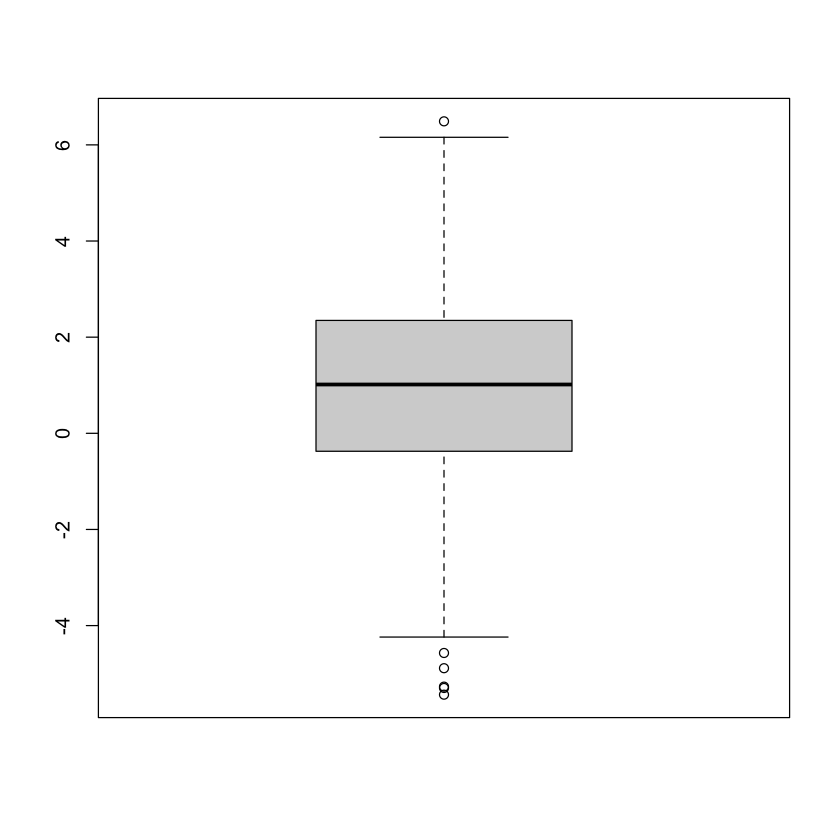

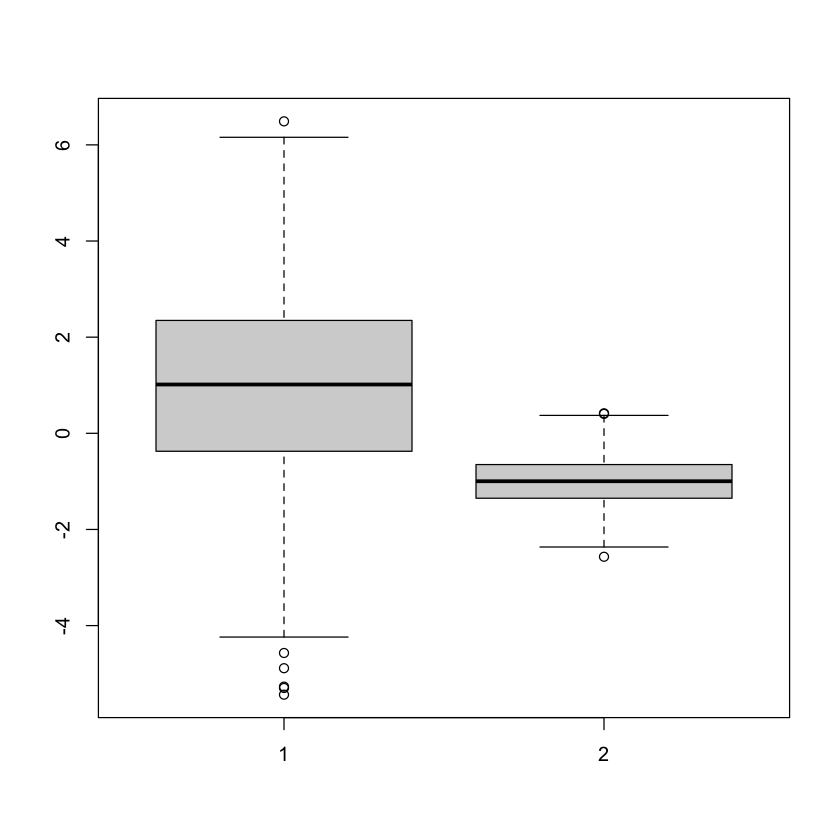

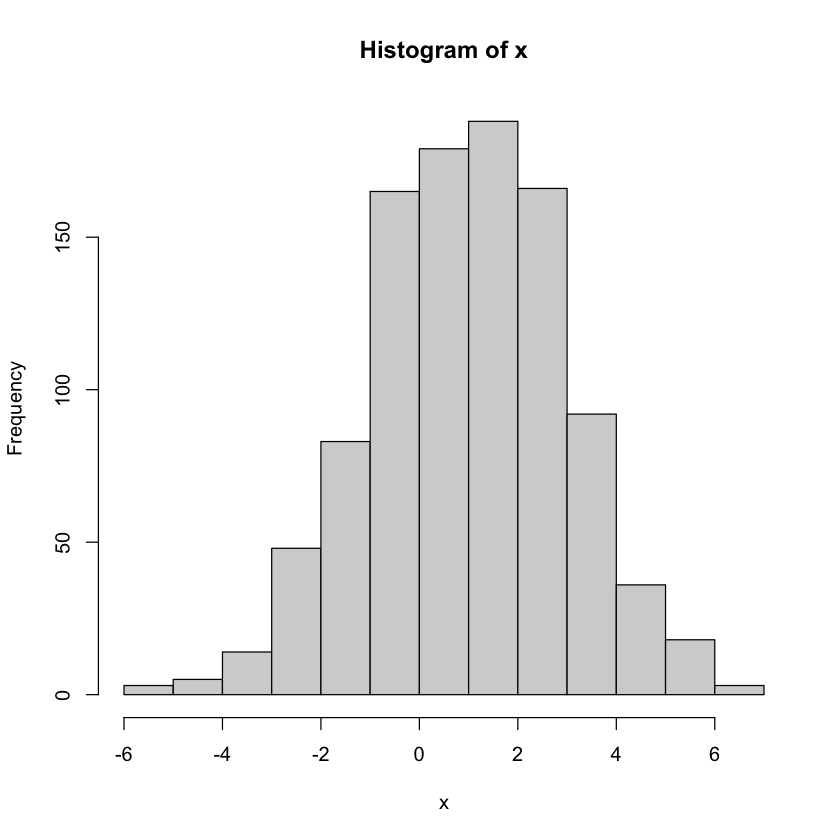

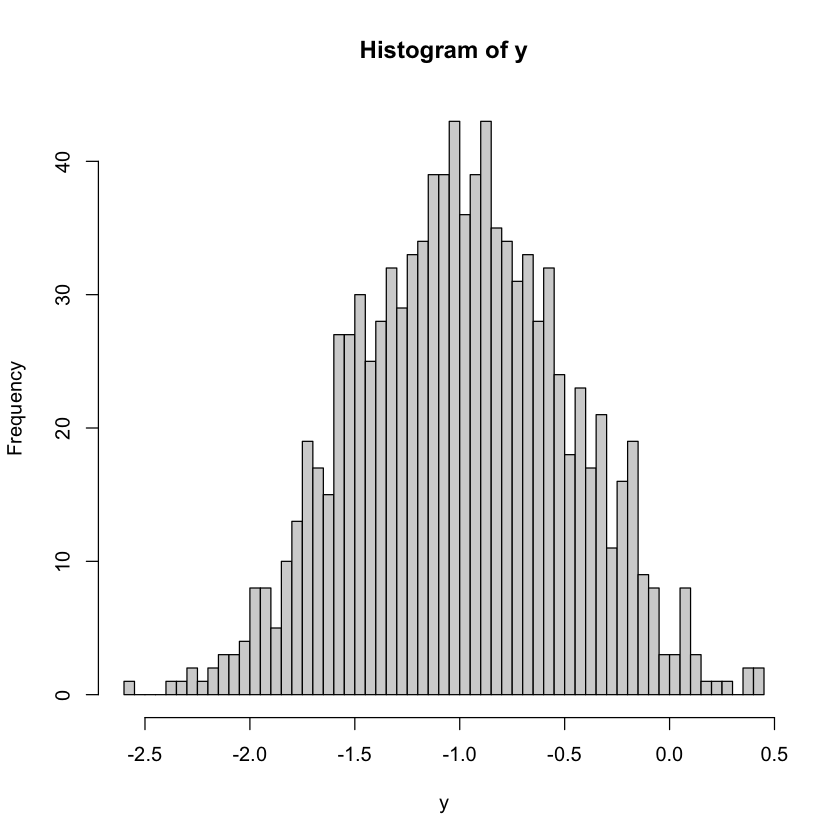

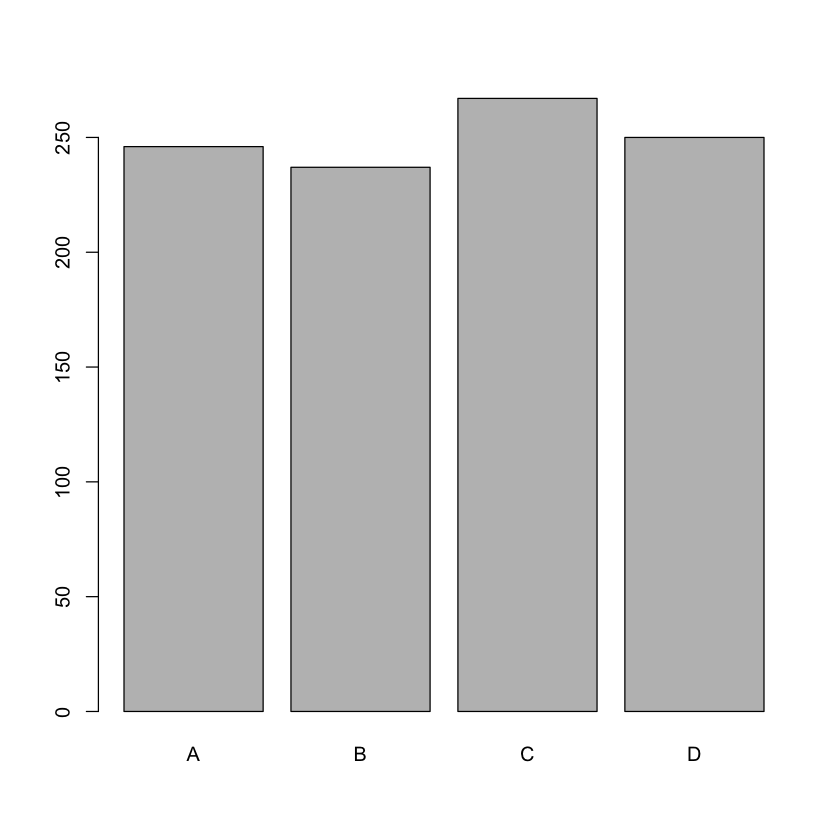

In [73]:
set.seed(666)
x <- rnorm(1e3, mean = 1, sd = 2)
y <- rnorm(1e3, mean = -1, sd = 0.5)
z <- sample(LETTERS[1:4], 1e3, replace = TRUE)

# Boxplot (look at the set of arguments)
boxplot(x)
boxplot(x, y)  # Joint plot

# Histogram
hist(x)
hist(y, breaks = 50)  # Number of columns

# Barplot (categorical variable)
barplot(table(z))

However, the generic function to generate static charts in `R` is `plot()`. The functions we just used have `plot()` underlying their structure, and use the same parameters. This function allows for a large number of arguments that allow to fully customize it to what you might need.

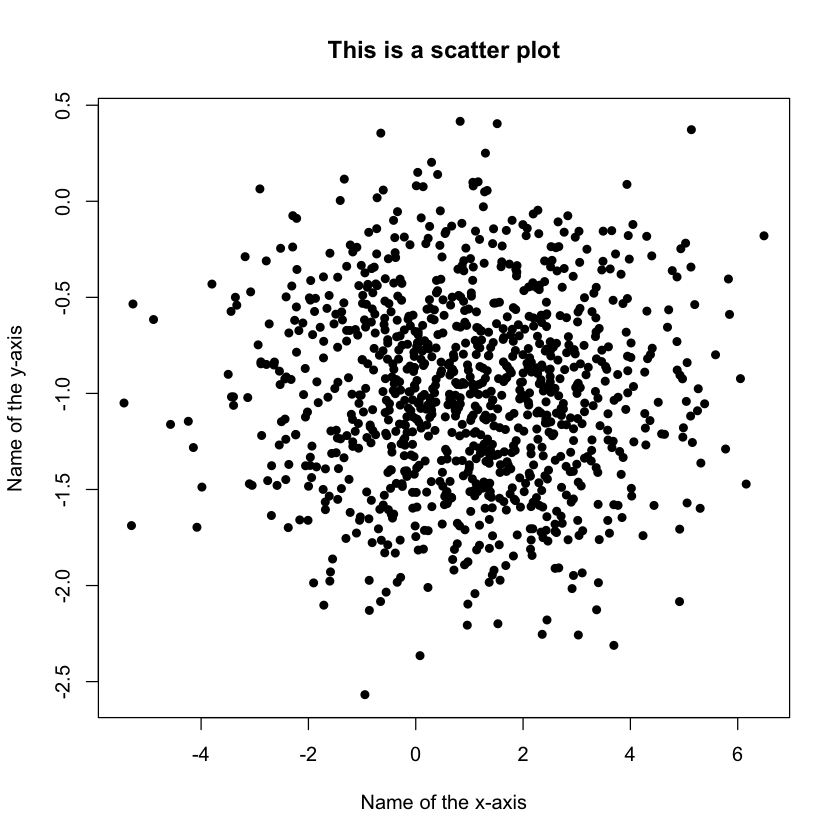

In [74]:
plot(x, y, col = 'black', pch = 16,  # "pch" is a parameter determining the shape of the dot
  xlab = 'Name of the x-axis',
  ylab = 'Name of the y-axis',
  main = 'This is a scatter plot')

One key-parameter is `type`, which determines the nature of the plot. By default this is of `type = 'p'`, i.e. of points. Set it to `type = 'l'` for a line plot, or, for example, or to `type = 'n'` to just plot the framework. 

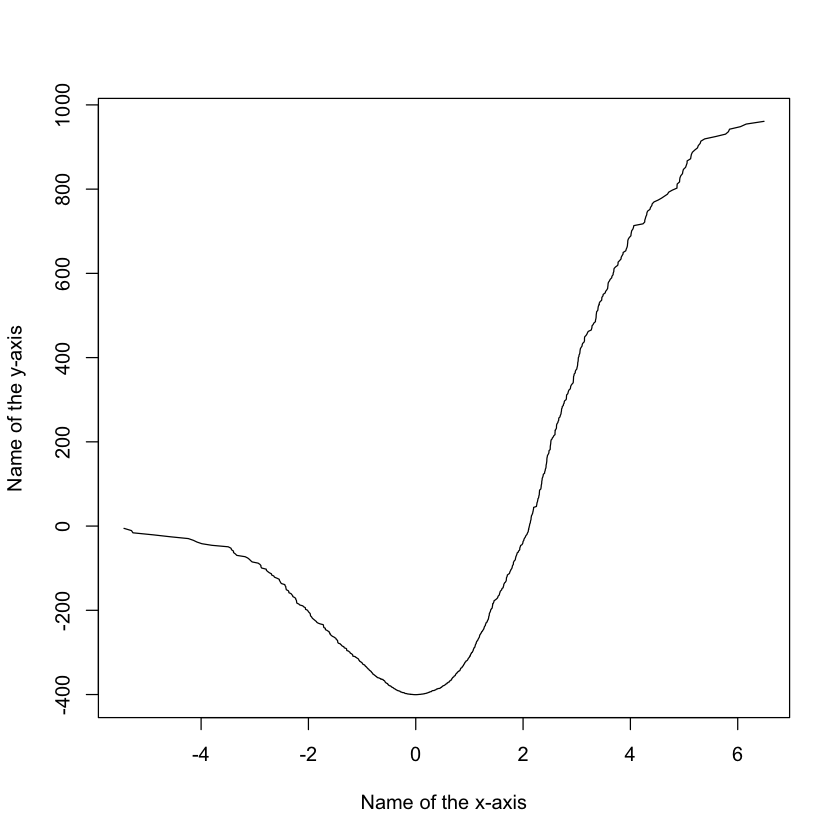

In [75]:
# Line plots
plot(sort(x), cumsum(sort(x)), type = 'l',
  xlab = 'Name of the x-axis',
  ylab = 'Name of the y-axis')

Also note the `col` parameter, which is used to specify the colour. This parameter is quite flexible, many generic colours are available as text (`black`, `blue`, `red`, etc.), but you can also give it integers (default colours), RGB codes and hexadecimal codes. 

Other very relevant parameters:

*  `xlim`: two-position vector to establish limits of the $x$-axis
*  `ylim`: same for the $y$-axis
*  `xaxt`: boolean to have values on the $x$-axis
*  `yaxt`: boolean to have values on the $y$-axis
*  `asp`: sets the aspect-ratio of the plot
*  `frame.plot`: draw a frame on the edges of the plot
*  `log`: to use a logarithmic scale on either axis

There are other more general graphical parameters that you can specify as well, such as `col` or `pch`, we highlight the following:

*   `bg`: background colours of the plot symbols
*   `cex`: size of the plot symbols (by default is 1)
*   `col`: for colour, but also if you want to regulate opacity of the symbols, e.g. `col = alpha(cols, 0.5)` gives them an opacity of 50%
*   `lty` (for line plots): type of line (solid, dashed, points...)
*   `lwd` (for line plots): width of the lines

The `plot()` function is the backbone to most static diagrams in `R`. We introduce a few more functions to complement it:

In [76]:
# Run again a simple linear model
set.seed(666)
n <- 100  # rows
X <- matrix(rnorm(n), nrow = n, ncol = 1)  # Regression matrix
b <- 1  # Regression coefficient
y <- X %*% b + rnorm(n)  # Model: y = X * b + epsilon, epsilon is N(0, 1)
df <- cbind.data.frame(y, X)  # Put all the data into one data.frame
colnames(df) <- c('y', 'x')  # Column names

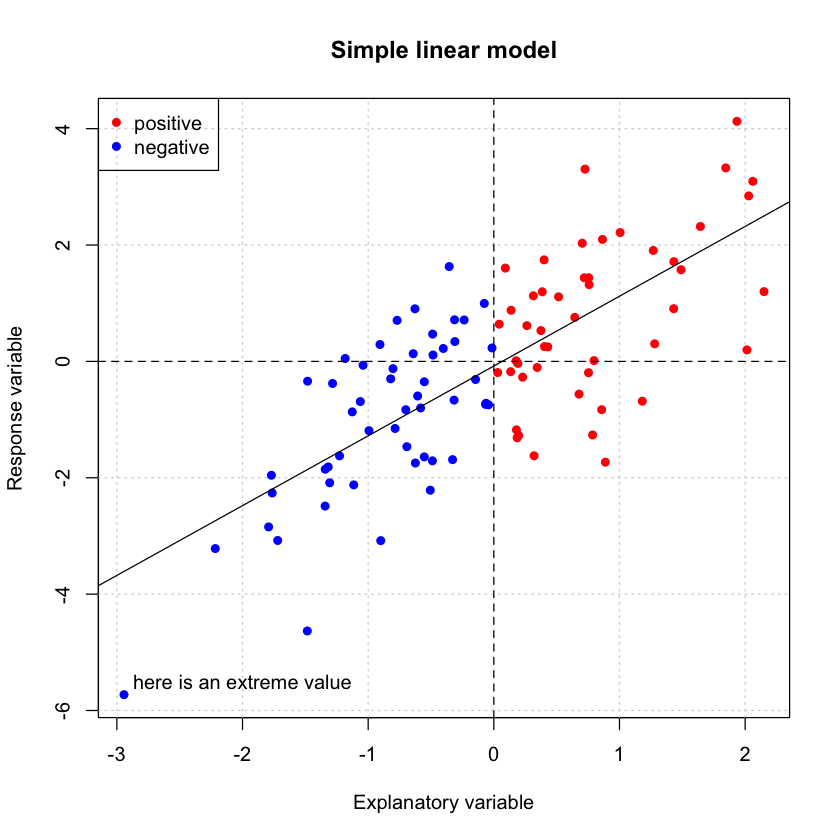

In [77]:
# We will plot the estimated equation
plot(df[, 'x'], df[, 'y'],
  xlab = 'Explanatory variable',
  ylab = 'Response variable',
  main = 'Simple linear model',
  type = 'n')  # Create only the framework

# Filling the plot
grid()  # Adds a fine grid
neg.x <- which(df[, 'x'] < 0)  # Observations that have negative "x"
pos.x <- which(df[, 'x'] > 0)  # Observations that have positive "x"
points(df[neg.x, 'x'], df[neg.x, 'y'], col = 'blue', pch = 16)  # Blue points for negative x's
points(df[pos.x, 'x'], df[pos.x, 'y'], col = 'red', pch = 16)  # Red points for negative x's
abline(lm(y ~ x, data = df))  # Add line with regression model
abline(v = 0, lty = 2)  # Add a line "vertical" at 0
abline(h = 0, lty = 2)  # Add a line "horizontal" at 0
text(-2, -5.5, 'here is an extreme value')  # Add text to the plot at given coordinates

# Legend
legend('topleft', legend = c('positive', 'negative'), col = c('red', 'blue'), pch = 16)  

# For a line plot you would need the function "lines()" -- works just the same
# Try replacing the FALSE with a TRUE to ruin your plot
if (FALSE) {
  values <- seq(-3, 3, 0.01)
  lines(values, sin(values), col = 'orange', lwd = 2)
}

**All these functions are super flexible**, I recommend exploring them.

Finally, note that you can make multiple plots on the same frame, and that you can store them out as `.png`, `.jpeg`, or `.pdf` (recommended). Here is how:

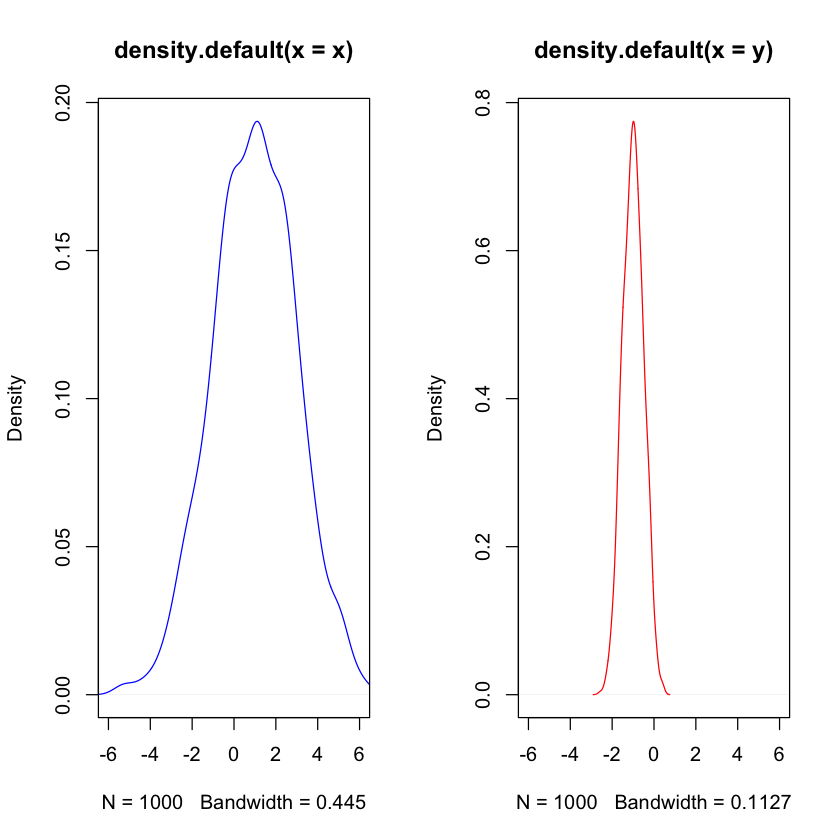

In [78]:
set.seed(666)
x <- rnorm(1e3, mean = 1, sd = 2)
y <- rnorm(1e3, mean = -1, sd = 0.5)

# Define the external file as at <file_path.ext>
#png(<file_path.png>, height = 4, width = 6)  # To save as .png
#jpeg(<file_path.jpeg>, height = 4, width = 6)  # To save as .jpeg
#pdf(<file_path.pdf>, height = 4, width = 6)  # To save as .pdf
par(mfrow = c(1, 2))  # 1 row and two columns of plots
plot(density(x), xlim = c(-6, 6), col = 'blue')  # This plots a kernelised density of the sample
plot(density(y), xlim = c(-6, 6), col = 'red')
#dev.off()  # If you save it externally, run this at the end to close connection!

---
## 11. Popular packages

Out of all the packages available in `R`, some are used by a wide variety of user's and have transformed them into the gold standard to process some operations. The list of useful packages is endless, so we will just highlight a few of the most popular ones. Feel free, however, to explore the package universe, there is pretty much on for anything you can think of.

### 11.1 `dplyr`

This is a popular package that is designed to clean, process, and manipulate data in a faster and more compact way than the canonical methods we have exposed above. In short, it offers a fast alternative to manage tabular data (`data.frame`) with simpler *grammar* than base `R`. We highlight the main operations that can be done with `dplyr`, and offer the corresponding base method to compare.

In [79]:
# Load the package
library(dplyr)

# Dataset: air pollution and temperature data for the city of Chicago (IL)
link <- "https://raw.githubusercontent.com/barcelonagse-datascience/academic_files/master/data/chicago"
chicago <- readRDS(url(link, "rb"))  # url() declares the link as an active file

# General info
dim(chicago)  # 6940x8
class(chicago)  # data.frame
head(chicago)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 6940    8

[1] "data.frame"

,city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
,<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,chic,31.5,31.500,1987-01-01,NA,34.00000,4.250000,19.98810
2,chic,33.0,29.875,1987-01-02,NA,NA,3.304348,23.19099
3,chic,33.0,27.375,1987-01-03,NA,34.16667,3.333333,23.81548
4,chic,29.0,28.625,1987-01-04,NA,47.00000,4.375000,30.43452
5,chic,32.0,28.875,1987-01-05,NA,NA,4.750000,30.33333
6,chic,40.0,35.125,1987-01-06,NA,48.00000,5.833333,25.77233


In [80]:
# select(): keep sets of columns
data <- dplyr::select(chicago, city:dptp)  # Select variables from 'city' to 'dptp'
data <- dplyr::select(chicago, -(city:dptp))  # All but this range
data <- dplyr::select(chicago, ends_with('2'))  # That the column name ends in '2'
data <- dplyr::select(chicago, starts_with('d'))  # That it starts with 'd'

# Same thing with base R...
if (FALSE) {
  data <- chicago[, colnames(chicago) %in% colnames(chicago)[1:3]]
  data <- chicago[, ! colnames(chicago) %in% colnames(chicago)[1:3]]  # NOT in
  data <- chicago[, grep('2$', colnames(chicago))]
  data <- chicago[, grep('^d', colnames(chicago))]
}

In [81]:
# filter(): keep sets of observations
chic.f <- dplyr::filter(chicago, (pm25tmean2 > 30) & (tmpd > 80))

summary(chic.f[, 'pm25tmean2'])
summary(chic.f[, 'tmpd'])

# Same thing with base R...
if (FALSE) {
  chic.f <- chicago[which(chicago[, 'pm25tmean2'] > 30 & chicago[, 'tmpd'] > 80), ]
}

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  31.20   32.70   33.90   36.68   38.85   51.54 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     81      82      82      83      84      86 

In [82]:
# arrange(): sort the observations by some criterion
chicago <- dplyr::arrange(chicago, date)  # by date (ascending)
chicago <- dplyr::arrange(chicago, desc(date))  # descending

# Same thing with base R...
if (FALSE) {
  chicago <- chicago[order(chicago[, 'date'], decreasing = FALSE), ]
  chicago <- chicago[order(chicago[, 'date'], decreasing = TRUE), ]
}

In [83]:
# rename(): change column names
chicago <- dplyr::rename(chicago, dewpoint = dptp, pm25 = pm25tmean2)  # Some names are obscure

# Same thing with base R...
if (FALSE) {
  colnames(chicago)[colnames(chicago) == 'dptp'] <- 'dewpoint'
  colnames(chicago)[colnames(chicago) == 'pm25'] <- 'pm25tmean2'
}

In [84]:
# mutate(): compute transformations of variables
chicago <- dplyr::mutate(chicago, pm25detrend = pm25 - mean(pm25, na.rm = TRUE))

# Same thing with base R...
# (check also base function: with())
if (FALSE) {
  chicago[, 'pm25detrend'] <- chicago[, 'pm25'] - mean(chicago[, 'pm25'], na.rm = TRUE)
  #chicago[, 'pm25detrend'] <- scale(chicago[, 'pm25'], center = TRUE, scale = FALSE)  # Even simpler
}

In [85]:
# For example, we might want to know what the average annual level of PM2.5 is. 
# The stratum is the year and that is something we can derive from the date variable.
chicago_new <- mutate(chicago, year = as.POSIXlt(date)$year + 1900 )

# group_by() and summarize(): generate summary stats based on strata
years <- dplyr::group_by(chicago_new, year)
summ <- dplyr::summarize(years, yearlypm25 = mean(pm25, na.rm=TRUE),
  o3 = max(o3tmean2, na.rm = TRUE), no2 = median(no2tmean2, na.rm = TRUE))
tail(summ)

# Same thing with base R...
if (TRUE) {
  summ2 <- cbind(
    tapply(chicago_new[, 'pm25'], chicago_new[, 'year'], mean, na.rm = TRUE),
    tapply(chicago_new[, 'o3tmean2'], chicago_new[, 'year'], max, na.rm = TRUE),
    tapply(chicago_new[, 'no2tmean2'], chicago_new[, 'year'], median, na.rm = TRUE))
  tail(summ2)
}

`summarise()` ungrouping output (override with `.groups` argument)



year,yearlypm25,o3,no2
<dbl>,<dbl>,<dbl>,<dbl>
2000,16.93806,55.76103,23.46082
2001,16.92632,51.81984,25.06522
2002,15.27335,54.88043,22.73750
2003,15.23183,56.16608,24.62500
2004,14.62864,44.48240,23.39130
2005,16.18556,58.84126,22.62387


2000,16.93806,55.76103,23.46082
2001,16.92632,51.81984,25.06522
2002,15.27335,54.88043,22.73750
2003,15.23183,56.16608,24.62500
2004,14.62864,44.48240,23.39130
2005,16.18556,58.84126,22.62387


You can also do the usual `join` operations using

*   `inner_join(df1, df2, by = c('<column_name(s)>'))`
*   `outer_join(df1, df2, by = c('<column_name(s)>'))`
*   `left_join(df1, df2, by = c('<column_name(s)>'))`
*   `right_join(df1, df2, by = c('<column_name(s)>'))`

Natively this can be done with the `merge()` function we introduced before.

A final feature of this syntax is the use of the *funny* pipeline operator, `%>%`. This operator enables to concatenate together multiple `dplyr` functions in a sequence.

In [86]:
# Repeat the previous operation by month (with the pipeline)
# Structure (L-to-R): result <- first(x) %>% second %>% third
summ <- mutate(chicago, month = as.POSIXlt(date)$mon + 1) %>%
  group_by(month) %>%
  summarize(pm25_max = max(pm25, na.rm = TRUE),
    o3_max = max(o3tmean2, na.rm = TRUE),
    no2_max = max(no2tmean2, na.rm = TRUE))

summ

`summarise()` ungrouping output (override with `.groups` argument)



month,pm25_max,o3_max,no2_max
<dbl>,<dbl>,<dbl>,<dbl>
1,49.47143,28.22222,52.44697
2,61.50000,37.37500,57.56439
3,47.73750,39.05000,53.89485
4,46.70000,47.94907,57.52542
5,56.50000,52.75000,51.28535
6,51.53750,66.58750,52.20833
7,41.40000,59.54167,62.47998
8,44.48750,53.96701,55.90522
9,56.50000,57.48864,53.13333


Use responsibly and with caution, this becomes complicated quickly and debugging can turn into a nightmare.

### 11.2 `data.table`

This is an alternative library to `dplyr`, and its main advantage is speed. In particular, when doing merges (joins) and when reading data. For small datasets the difference may not be relevant, but this changes quickly whenever you deal with *large* datasets (+100 Mb). `data.table` provides an enhanced version of `data.frame`'s, and is compatible with most base methods to manage them, although it has expanded `data.table` methods.

You can follow the official [*vignette*](https://cran.r-project.org/web/packages/data.table/vignettes/datatable-intro.html) of `data.table` for an introduction. A complete [cheat sheet](https://raw.githubusercontent.com/rstudio/cheatsheets/master/datatable.pdf) is also available online.

### 11.3 `ggplot2`

This is one of the most used and abused libraries in `R`, which is designed to make the plotting part of the work a little bit more simple and short. The fundamental idea is to treat plots as any other object in `R` (in particular a `ggplot` object), and to which you can add *layers*, using the simple `+` operator, to make it more complete. This can become particularly helpful for highly complex plots where there are many layers of information, simplifying the amount of code significantly.

A very brief example:

In [87]:
# Use the "mtcars" built-in data
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


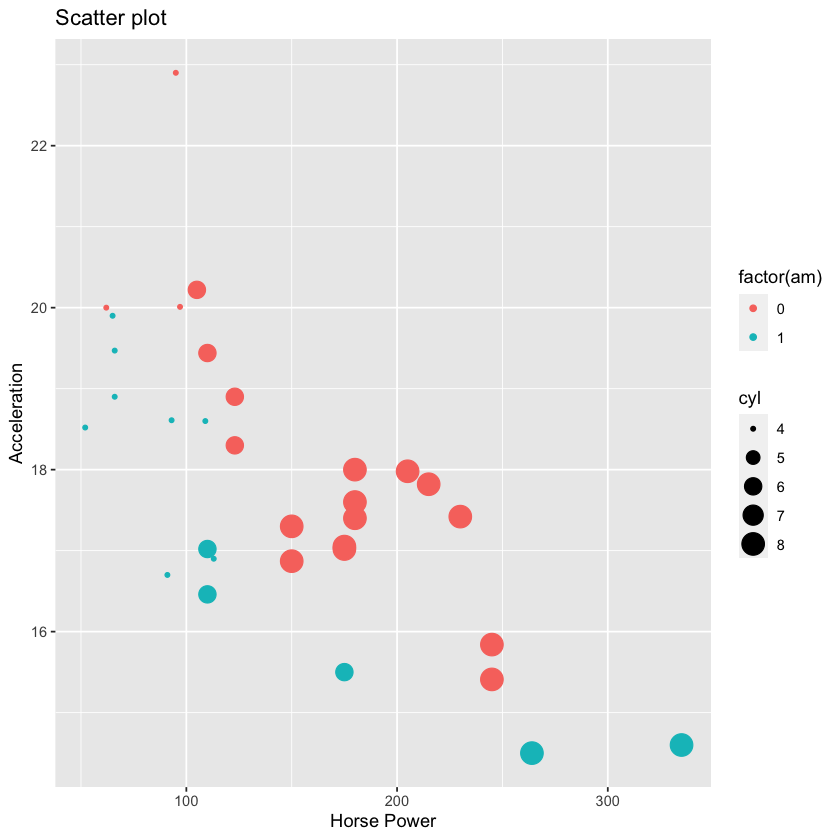

In [88]:
# We use now colour and size parameters using other features
library(ggplot2)
ggplot(data = mtcars, aes(x = hp, y = qsec, size = cyl)) +  # variables "hp" on x-axis, "qsec" on y-axis, 
  geom_point(aes(col = factor(am))) +  # Color of the dot (Type of car: automatic or manual)
  ggtitle('Scatter plot') + ylab('Acceleration') + xlab('Horse Power') 

Tutorials and a helpful cheat sheet can be found at the official site of the package:

*   https://ggplot2.tidyverse.org/index.html

The use of `ggplot` is a matter of personal taste and its results are more of an aesthetic nature, since the appearence of a plot is highly malleable with "little" work on the coder's end. Personally, if I have to escape from base `R` plotting, I've felt more inclined to use the [`plotly` package](https://plotly.com/r/) in the past, which is a cross-platform graphic interface that can deal with complex and interactive plotting needs, but they are both quite similar in spirit.

### 11.4 `shiny`

This is a very useful package that is widely used to create interactive webpages with `R`. The idea is to code all visual elements of a webpage that is centered around visualizing and interacting with some data that runs in `R` on the back. It is fairly simple and intuitive to use and implement, and produces outstanding results in a minimal amount of time of development.

A proper introduction to `shiny` is well beyond the scope of this course, but the official tutorials are excellent to get you going:

*   https://shiny.rstudio.com/tutorial/

Have a look at the [gallery](https://shiny.rstudio.com/gallery/) to see what you can do with this and spark your creativity.


---
## 12. Notes on relevant topics
 
We introduce some specific topics that can be dealt with in `R`.

### 12.1 Working with time and dates

Dates are another type of object in `R`, which you can be operated on like other objects. They are of class `Date` (dates), `POSIXt` (dates and times) and `POSIXct` (dates and times with a time zone) -- you can use `is.` and `as.` operations on them.

In [89]:
# Time registered in the computed
today <- Sys.Date()  # Current time (class: Date)
now <- Sys.time()  # Current time
print(now)
class(now)

# Convert string to date and time format (look at how format is indicated!)
date1 <- strptime('2022-01-04 15:00:00', format = '%Y-%m-%d %H:%M:%S')
date2 <- strptime('2022-01-03 14:00:00', format = '%Y-%m-%d %H:%M:%S', tz = 'GMT')  # Add a time zone
date3 <- as.Date('2022-01-04', format = '%Y-%m-%d')  # If you only have date (no time)

# There is a less opaque function to do that
ISOdatetime(year = 2022, month = 01, day = 04, hour = 15, min = 0, sec = 0)

[1] "2022-06-26 13:54:06 CEST"


[1] "POSIXct" "POSIXt"

[1] "2022-01-04 15:00:00 CET"

In [90]:
# You can also coerce to "POSIXct" like in other classes
date1 <- as.POSIXct('2022-01-04 15:00', format = '%Y-%m-%d %H:%M')
str(date1)
unclass(date1)  # it is subsettable!

 POSIXct[1:1], format: "2022-01-04 15:00:00"


[1] 1641304800
attr(,"tzone")
[1] ""

In [91]:
# Some information encoded in a time object
julian(now)  # Julian time
months(now)
quarters(now)
weekdays(now)
seq.Date(from = as.Date('2017-01-04'),
  to = as.Date('2022-01-04'),
  by = "year")  # Sequence of dates

# You can format it the way you need
format(date1, format = '%H:%M:%S')
# There is a large number of formats: type "?strptime" to discover all abbreviations

Time difference of 19169.5 days

[1] "June"

[1] "Q2"

[1] "Sunday"

[1] "2017-01-04" "2018-01-04" "2019-01-04" "2020-01-04" "2021-01-04"
[6] "2022-01-04"

[1] "15:00:00"

In [92]:
# Time difference between to time objects
difftime(date1, date2)

# In fact, you can operate with time objects as if they were numeric
date1 - date2  # Same
date1 + 1  # Units are seconds
date1 > date2

# Count days from a date
as.Date(7654, origin = "2000-01-01")

Time difference of 1 days

Time difference of 1 days

[1] "2022-01-04 15:00:01 CET"

[1] TRUE

[1] "2020-12-15"

Here we have only provided basic native ways to dealing with time objects in `R`. I recommend you have a look at the `lubridate` package if you have more advanced or intensive needs. A link to the *cheat sheet*:

*  https://rawgit.com/rstudio/cheatsheets/main/lubridate.pdf

This package provides a lot of operations to manage date objects, as well as a few cool features.

### 12.2 Web scrapping and `html` parsing

This basically consists on reading web pages from `R` and processing the information that the `html` contains. There are no base methods capable of dealing adequately with this task, thus for such purpose a popular package is `rvest`.

To illustrate this, we will try to access weather forecast data for Manhattan, NY from the website of the U.S. [National Weather Service](https://forecast.weather.gov), and lay out the weather forecast we retrieve on a simple table.

In [93]:
library(rvest)  # To access and read HTML

# URL containing weather forecast in Manhattan, NY
wurl <- 'https://forecast.weather.gov/MapClick.php?lat=40.7145&lon=-74.006#.YcSmhB3OGNY'
html <- rvest::read_html(wurl)  # Read the HTML of the webpage

ERROR: Error in library(rvest): there is no package called ‘rvest’


In [94]:
# Parse the nodes in the HTML
nodes <- rvest::html_nodes(html, ".temp")
nodes

ERROR: Error in loadNamespace(name): there is no package called ‘rvest’


In [95]:
# Extract the text from each node
node.txt <- sapply(nodes, rvest::html_text)

ERROR: Error in loadNamespace(name): there is no package called ‘rvest’


In [96]:
# Extract numerical values
nums <- readr::parse_number(node.txt)
n <- length(nums) - 1  # Ignore the last element
forecasts <- cbind(nums[seq(1, n, 2)], nums[seq(2, n, 2)])
forecasts

ERROR: Error in stopifnot(is.character(x)): oggetto "node.txt" non trovato


In [97]:
# Make it pretty
colnames(forecasts) <- c('High', 'low')
rownames(forecasts) <- as.character(seq.Date(
  from = as.Date('2022-01-04'),
  to = as.Date('2022-01-07'),
  by = "day"))
forecasts  # Remember you can save this object as an R Data file

ERROR: Error in colnames(forecasts) <- c("High", "low"): oggetto "forecasts" non trovato


This is an extremely simple example, but there are uncountable things you can do with `html` data. I recommend you go deeper into what `rvest` can do if this is something you are interested in.

One last **disclaimer:** web scrapping on certain scales may not be legit depending on the site, or even not completely legal under some jurisdictions, especially if you use what you gather with commercial purposes. Many sites provide what's called a [`robots.txt`](https://developers.google.com/search/docs/advanced/robots/intro) file that tells you what you are allowed to do with data you collect from their website. Respect that.

**Kudos for reaching the end!**